# Problem Statement

<p style="font-size:25px">Generating Brain Tumor MRI images for Data Augmentation using Generative Adversarial Networks</p>

# About Brain Tumor

<p style="font-size:20px">A brain tumor is a collection, or mass, of abnormal cells in your brain. Your skull, which encloses your brain, is very rigid. Any growth inside such a restricted space can cause problems.
Brain tumors can be cancerous (malignant) or noncancerous (benign). When benign or malignant tumors grow, they can cause the pressure inside your skull to increase. This can cause brain damage, and it can be life-threatening.
Brain tumors are categorized as primary or secondary:
<ul>
    <li style="font-size:20px">A primary brain tumor originates in your brain. Many primary brain tumors are benign.</li>
    <li style="font-size:20px">A secondary brain tumor, also known as a metastatic brain tumor, occurs when cancer cells spread to your brain from another organ, such as lung or breast. </li>
</ul>
</p>

<p align="center">
<img src="https://i0.wp.com/post.healthline.com/wp-content/uploads/2022/02/2009199_Understanding-Brain-Tumors-01.jpg?w=1155&h=1887" style="width: 725px; height: 500px"/>
</p>
<br>

# How is Brain Tumor diagnosed?
<br>
<img src="https://qph.cf2.quoracdn.net/main-qimg-3cd4287f29cd7fdc7f68ab223107bb64-pjlq" style="width:700px; height:400px">
<br>

## Magnetic Resonance Imaging (MRI)
<p>
    <ul>
        <li  style="font-size:20px">An MRI uses magnetic fields to produce detailed images of the body.<br> MRI can be used to measure the tumor’s size. A special dye called a contrast medium is given before the scan to create a clearer picture.</li> 
        <li  style="font-size:20px">This dye can be injected into a patient’s vein or given as a pill or liquid to swallow.<br> MRIs create more detailed pictures than CT scans and are the preferred way to diagnose a brain tumor.</li> 
        <li  style="font-size:20px">The MRI may be of the brain, spinal cord, or both, depending on the type of tumor suspected and the likelihood that it will spread in the CNS.</li>
        <li  style="font-size:20px">There are different types of MRI. The results of a neuro-examination, done by the internist or neurologist, helps determine which type of MRI to use.</li>
    </ul>
</p>

# What do the Numbers Say?

<ul>
    <li style="font-size:20px">In India, every year, 40,000 - 50,000 patients are diagnosed with a brain tumor. 20 percent of them are children</li>
    <li style="font-size:20px">At the current population level of the country (1.417 billion), this means only <b>0.0035 percent</b> are diagnosed with Brain Tumor!</li>
    <li style="font-size:20px">Let's assume that all MRI scans produce 100% accurate results. This would mean that for every 10,000 MRI scans, we only get <b>35 samples</b> showing Brain Tumor versus many more that don't</li>
    <li style="font-size:20px">This, combined with other problems in accessing Medical data, would lead to Machine Learning problems such as <b>Class Imbalance</b> and <b>Bias</b></li>
</ul>

<p style="font-size:15px">Source: https://health.economictimes.indiatimes.com/news/diagnostics/brain-tumors-death-on-diagnosis/88090467</p>

# A Solution - Generative Modelling

<p style="font-size:20px">Generative models, or deep generative models, are a class of deep learning models that learn the underlying data distribution from the sample. These models can be used to reduce data into its fundamental properties, or to generate new samples of data with new and varied properties</p>

# Generative Adversarial Networks

<p style="font-size:20px">Generative adversarial networks are implicit likelihood models that generate data samples from the statistical distribution of the data. They’re used to copy variations within the dataset. They use a combination of two networks: generator and discriminator.</p>
<br>
<img src="https://miro.medium.com/v2/resize:fit:720/1*9jwIuW0KPi3THIvoYg9BUQ.png" />



## <u> The Generator: </u>
<p style="font-size:20px">A generator network takes a random normal distribution (z), and outputs a generated sample that’s close to the original distribution.</p>

## <u> The Discriminator: </u>
<p style="font-size:20px">A discriminator tries to evaluate the output generated by the generator with the original sample, and outputs a value between 0 and 1. If the value is close to 0, then the generated sample is fake, and if the value is close to 1 then the generated sample is real.</p>

## <u> What the Entire thing looks like: </u>

<br><img src="https://s3.amazonaws.com/kajabi-storefronts-production/blogs/12746/images/iAOOdduQyCICwiv31aHa_dcgan.png">

## <u> How do GANs work ? </u>

<p style="font-size:20px">A random normal distribution is fed into the generator. The generator then outputs a random distribution, since it doesn’t have a reference point. <br>
Meanwhile, an actual sample, or ground truth, is fed into the discriminator. The discriminator learns the distribution of the actual sample. When the generated sample from the generator is fed into the discriminator, it evaluates the distribution.<br>
If the distribution of the generated sample is close to the original sample, then the discriminator outputs a value close to ‘1’ = real. If both the distribution doesn’t match or they aren’t even close to each other, then the discriminator outputs a value close to ‘0’ = fake.</p>

## <u> The Minimax setting </u>

<br><img src="https://static.packt-cdn.com/products/9781789139907/graphics/bf03e5ab-69ac-424d-84a7-48ea85e616ec.png" style="width:900px; height:150px;">

<p style="font-size:20px">The answer lies in the loss function or the value function; it measures the distance between the distribution of the data generated and the distribution of the real data. Both the generator and the discriminator have their own loss functions. The generator tries to minimize the loss function while the discriminator tries to maximize.</p>

# Setup

**In this project, I have used**
* Numpy and Tensorflow for Mathematical Operations
* Matplotlib and OpenCV for Image data handling and Visualization
* Keras for the Neural Networks

# Cell 1 — Setup & Globals

In [2]:
# ==== Cell 1: Setup & Globals ====
import os, re, glob, json, time, zipfile, random, math, shutil
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import (Input, Dense, Reshape, Flatten, Dropout, LeakyReLU,
                                     Conv2D, Conv2DTranspose, UpSampling2D, Embedding,
                                     Concatenate, Multiply)
from tensorflow.keras.optimizers import Adam

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

# ---- Repro ----
SEED = 40
np.random.seed(SEED); random.seed(SEED); tf.random.set_seed(SEED)

# ---- Data (YES-only) ----
DATASET_DIR = "/kaggle/input/brain-mri-images-for-brain-tumor-detection/yes"

# ---- IO ----
BASE_OUT = "/kaggle/working/gan_mri_outputs"
os.makedirs(BASE_OUT, exist_ok=True)

# ---- Image / model params (fixed) ----
WIDTH, HEIGHT, CHANNELS = 128, 128, 1
NOISE_DIM    = 100
BATCH_SIZE   = 4
STEPS_PER_EPOCH = 500      # <== per your request (reduced)
TARGET_EPOCHS_LIST = [10, 30, 50]  # we’ll “extend” to these
OPTIMIZER = Adam(0.0002, 0.5)

# ---- tiny helpers ----
def make_out(model_name):
    d = os.path.join(BASE_OUT, model_name)
    for sub in ["weights","samples","metrics"]: os.makedirs(os.path.join(d,sub), exist_ok=True)
    return d

def latest_epoch_for(out_dir, name, comp='G'):
    wdir = os.path.join(out_dir, "weights")
    if not os.path.isdir(wdir): return 0
    pat = re.compile(rf"{re.escape(name)}_{comp}_e(\d+)\.h5$")
    latest = 0
    for f in os.listdir(wdir):
        m = pat.match(f)
        if m: latest = max(latest, int(m.group(1)))
    return latest

def sample_noise(n): return np.random.normal(0,1, size=(n, NOISE_DIM)).astype('float32')

def save_image_grid(imgs, path, grid=(4,4), figsize=(8,8)):
    r,c = grid; plt.figure(figsize=figsize)
    imgs = np.asarray(imgs)
    for i in range(min(r*c, imgs.shape[0])):
        plt.subplot(r,c,i+1)
        plt.imshow((imgs[i].squeeze()*0.5+0.5), cmap='gray')
        plt.axis('off')
    plt.tight_layout(); plt.savefig(path, bbox_inches='tight'); plt.close()


# Cell 2 — Load YES images, preprocess, preview

Training set: (155, 128, 128, 1) | min/max: -1.0 1.0


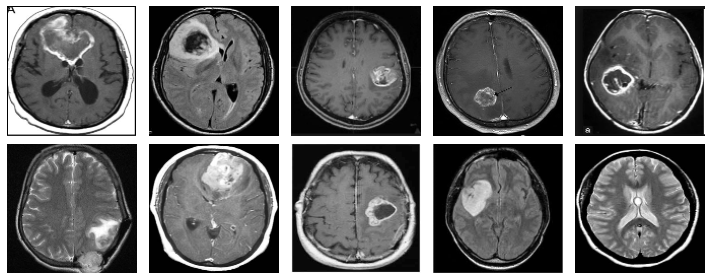

In [3]:
# ==== Cell 2: Load YES images, preprocess, preview ====
def load_images_yes_only(folder_yes):
    imgs = []
    for p in os.listdir(folder_yes):
        fp = os.path.join(folder_yes, p)
        try:
            im = cv2.imread(fp, cv2.IMREAD_GRAYSCALE)
            if im is None: continue
            im = cv2.resize(im, (WIDTH, HEIGHT))
            imgs.append(im)
        except: pass
    x = np.array(imgs, dtype=np.float32)
    if x.ndim == 3: x = x[..., None]
    # normalize to [-1,1]
    x = (x - 127.5) / 127.5
    return x

X_train = load_images_yes_only(DATASET_DIR)
y_train = np.ones((X_train.shape[0],), dtype=int)  # single-class labels for cGAN
print("Training set:", X_train.shape, "| min/max:", X_train.min(), X_train.max())

# quick preview
plt.figure(figsize=(10,4))
for i in range(10):
    idx = np.random.randint(0, X_train.shape[0])
    plt.subplot(2,5,i+1); plt.imshow((X_train[idx].squeeze()*0.5+0.5), cmap='gray'); plt.axis('off')
plt.tight_layout(); plt.show()


# Cell 3 — Metric helpers (FID, IS, SSIM, PSNR)

In [4]:
# ==== Cell 3: Metrics (FID, IS, SSIM, PSNR) ====
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from skimage.metrics import structural_similarity as ssim_metric, peak_signal_noise_ratio as psnr_metric

INCEPT_POOL = InceptionV3(include_top=False, pooling='avg', input_shape=(299,299,3))
INCEPT_SOFT = InceptionV3(include_top=True, weights='imagenet')

def _prep299(x):  # [-1,1] gray -> 3ch 299
    x = (x + 1.) * 127.5
    if x.shape[-1] == 1: x = np.repeat(x, 3, axis=-1)
    x = tf.image.resize(x, (299,299)).numpy()
    return preprocess_input(x)

def activations(images, batch=64):
    xs = _prep299(images)
    feats=[]
    for i in range(0, xs.shape[0], batch):
        feats.append(INCEPT_POOL.predict(xs[i:i+batch], verbose=0))
    return np.concatenate(feats, axis=0)

def _cov(x): return np.cov(x, rowvar=False)

def calculate_fid(real, fake):
    a1, a2 = activations(real), activations(fake)
    m1, m2 = a1.mean(0), a2.mean(0)
    s1, s2 = _cov(a1), _cov(a2)
    diff = m1 - m2
    covmean = tf.linalg.sqrtm(tf.cast(s1 @ s2, tf.complex64))
    covmean = tf.math.real(covmean)
    return float(diff.dot(diff) + np.trace(s1 + s2 - 2*covmean))

def calculate_is(images, splits=5):
    xs = _prep299(images)
    p = INCEPT_SOFT.predict(xs, verbose=0)
    N = p.shape[0]; scores=[]
    for k in range(splits):
        part = p[k*N//splits:(k+1)*N//splits, :]
        py = part.mean(0)
        kl = (part * (np.log(part+1e-10) - np.log(py+1e-10))).sum(1)
        scores.append(np.exp(np.mean(kl)))
    return float(np.mean(scores))

def calculate_ssim_psnr(real, fake, n=100):
    n = min(n, real.shape[0], fake.shape[0])
    idx_r = np.random.choice(real.shape[0], n, replace=False)
    idx_f = np.random.choice(fake.shape[0], n, replace=False)
    ssim_list, psnr_list = [], []
    for ir, ifa in zip(idx_r, idx_f):
        r = (real[ir].squeeze()+1.)/2.0
        f = (fake[ifa].squeeze()+1.)/2.0
        ssim_list.append(ssim_metric(r, f, data_range=1.0))
        psnr_list.append(psnr_metric(r, f, data_range=1.0))
    return float(np.mean(ssim_list)), float(np.mean(psnr_list))

def compute_metrics_for_model(model_name, epochs_to_score=None, n_real=256):
    out_dir = make_out(model_name)
    W = os.path.join(out_dir, "weights")
    M = os.path.join(out_dir, "metrics")
    os.makedirs(M, exist_ok=True)

    # choose epochs
    pat = re.compile(rf"{re.escape(model_name)}_G_e(\d+)\.h5$")
    available = sorted(int(pat.match(f).group(1)) for f in os.listdir(W) if pat.match(f))
    if epochs_to_score is None: epochs = available
    else: epochs = [e for e in epochs_to_score if e in available]
    if not epochs:
        print(f"[{model_name}] No matching epochs to score."); return

    # real pool
    n_real = min(n_real, X_train.shape[0])
    real_pool = X_train[np.random.choice(X_train.shape[0], n_real, replace=False)]

    # build a small factory to create G per model name
    def build_G(name):
        if name == "DCGAN":       return build_dcgan_G()
        if name == "StyleLite":   return build_stylelite_G()
        if name == "cGAN":        return build_cgan_G()
        if name == "WGAN_GP":     return build_wgan_G()
        raise ValueError(name)

    summary=[]
    for e in epochs:
        wp = os.path.join(W, f"{model_name}_G_e{e:03d}.h5")
        if not os.path.exists(wp): 
            print(f"[{model_name}] Missing weights for e{e:03d}"); 
            continue
        G = build_G(model_name); G.load_weights(wp)
        z = sample_noise(n_real)
        if model_name == "cGAN":
            # single-class dummy labels (1s)
            fake = G.predict([z, np.ones((n_real,1))], verbose=0)
        else:
            fake = G.predict(z, verbose=0)

        rec = {"epoch": e}
        try: rec["FID"] = calculate_fid(real_pool, fake)
        except Exception as er: rec["FID"] = None; print(f"[{model_name}] FID error @e{e}:", er)
        try: rec["IS"] = calculate_is(fake, splits=5)
        except Exception as er: rec["IS"] = None; print(f"[{model_name}] IS error @e{e}:", er)
        ssim_v, psnr_v = calculate_ssim_psnr(real_pool, fake, n=min(100, n_real))
        rec["SSIM"], rec["PSNR"] = float(ssim_v), float(psnr_v)

        with open(os.path.join(M, f"{model_name}_scores_e{e:03d}.json"), "w") as f:
            json.dump(rec, f)
        summary.append(rec)
        print(f"[{model_name}] e{e:03d} →", rec)

    # CSV
    import csv
    csv_path = os.path.join(M, f"{model_name}_scores_summary.csv")
    with open(csv_path, "w", newline="") as f:
        w = csv.DictWriter(f, fieldnames=["epoch","FID","IS","SSIM","PSNR"])
        w.writeheader()
        for r in sorted(summary, key=lambda x: x["epoch"]): w.writerow(r)
    print(f"[{model_name}] Summary CSV:", csv_path)


96124928/96112376 [==============================] - 6s 0us/step


# Cell 4 — Architectures (DCGAN, StyleLite, cGAN, WGAN-GP)

In [5]:
# ==== Cell 4: Architectures (G/D/Critic) ====

# ----- DCGAN -----
def build_dcgan_G():
    from tensorflow.keras.models import Sequential
    model = Sequential(name="DCGAN_G")
    model.add(Dense(32*32*256, input_dim=NOISE_DIM))
    model.add(LeakyReLU(0.2)); model.add(Reshape((32,32,256)))
    model.add(Conv2DTranspose(128, (4,4), strides=2, padding='same')); model.add(LeakyReLU(0.2))
    model.add(Conv2DTranspose(128, (4,4), strides=2, padding='same')); model.add(LeakyReLU(0.2))
    model.add(Conv2D(CHANNELS, (4,4), padding='same', activation='tanh'))
    return model

def build_dcgan_D():
    from tensorflow.keras.models import Sequential
    model = Sequential(name="DCGAN_D")
    model.add(Conv2D(64, (3,3), padding='same', input_shape=(WIDTH,HEIGHT,CHANNELS)))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(128, (3,3), strides=2, padding='same')); model.add(LeakyReLU(0.2))
    model.add(Conv2D(128, (3,3), strides=2, padding='same')); model.add(LeakyReLU(0.2))
    model.add(Conv2D(256, (3,3), strides=2, padding='same')); model.add(LeakyReLU(0.2))
    model.add(Flatten()); model.add(Dropout(0.4))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss="binary_crossentropy", optimizer=OPTIMIZER)
    return model

# ----- StyleLite (StyleGAN-lite) -----
def ada_instance_norm(x, style):
    ch = x.shape[-1]
    s = Dense(int(ch))(style); b = Dense(int(ch))(style)
    mean, var = tf.nn.moments(x, axes=[1,2], keepdims=True)
    x_norm = (x - mean) / tf.sqrt(var + 1e-8)
    s = tf.reshape(s, [-1,1,1,int(ch)]); b = tf.reshape(b, [-1,1,1,int(ch)])
    return s * x_norm + b

def style_block(x, style, filters):
    x = Conv2D(filters, 3, padding='same')(x); x = LeakyReLU(0.2)(x)
    x = ada_instance_norm(x, style); return x

def build_stylelite_G():
    z_in = Input(shape=(NOISE_DIM,))
    w = Dense(256, activation='relu')(z_in); w = Dense(256, activation='relu')(w)
    x = Dense(32*32*256)(z_in); x = Reshape((32,32,256))(x)
    x = style_block(x, w, 256)
    x = UpSampling2D()(x); x = style_block(x, w, 128)
    x = UpSampling2D()(x); x = style_block(x, w, 128)
    out = Conv2D(CHANNELS, 3, padding='same', activation='tanh')(x)
    return Model(z_in, out, name="StyleLite_G")

def build_stylelite_D():
    return build_dcgan_D()

# ----- cGAN (single-class friendly) -----
def build_cgan_G():
    z_in = Input(shape=(NOISE_DIM,))
    y_in = Input(shape=(1,))
    # for single class, multiply by ones is identity => same architecture as DCGAN-G
    zi = z_in
    x = Dense(32*32*256, input_dim=NOISE_DIM)(zi); x = LeakyReLU(0.2)(x)
    x = Reshape((32,32,256))(x)
    x = Conv2DTranspose(128, (4,4), strides=2, padding='same')(x); x = LeakyReLU(0.2)(x)
    x = Conv2DTranspose(128, (4,4), strides=2, padding='same')(x); x = LeakyReLU(0.2)(x)
    out = Conv2D(CHANNELS, (4,4), padding='same', activation='tanh')(x)
    return Model([z_in, y_in], out, name="cGAN_G")

def build_cgan_D():
    img_in = Input(shape=(WIDTH, HEIGHT, CHANNELS))
    x = Conv2D(64, (3,3), padding='same')(img_in); x = LeakyReLU(0.2)(x)
    x = Conv2D(128, (3,3), strides=2, padding='same')(x); x = LeakyReLU(0.2)(x)
    x = Conv2D(128, (3,3), strides=2, padding='same')(x); x = LeakyReLU(0.2)(x)
    x = Conv2D(256, (3,3), strides=2, padding='same')(x); x = LeakyReLU(0.2)(x)
    x = Flatten()(x); x = Dropout(0.4)(x)
    out = Dense(1, activation='sigmoid')(x)
    D = Model(img_in, out, name="cGAN_D")
    D.compile(loss="binary_crossentropy", optimizer=OPTIMIZER)
    return D

# ----- WGAN-GP -----
def build_wgan_G():      # reuse DCGAN generator for fairness
    return build_dcgan_G()

def build_wgan_critic():
    inp = Input(shape=(WIDTH, HEIGHT, CHANNELS))
    x = Conv2D(64, (3,3), padding='same')(inp); x = LeakyReLU(0.2)(x)
    x = Conv2D(128,(3,3),strides=2,padding='same')(x); x = LeakyReLU(0.2)(x)
    x = Conv2D(128,(3,3),strides=2,padding='same')(x); x = LeakyReLU(0.2)(x)
    x = Conv2D(256,(3,3),strides=2,padding='same')(x); x = LeakyReLU(0.2)(x)
    x = Flatten()(x); x = Dropout(0.4)(x)
    out = Dense(1)(x)
    return Model(inp, out, name="WGAN_Critic")

def gradient_penalty(C, real, fake):
    alpha = tf.random.uniform([real.shape[0], 1, 1, 1], 0., 1.)
    inter = alpha * real + (1 - alpha) * fake
    with tf.GradientTape() as gp_tape:
        gp_tape.watch(inter)
        pred = C(inter, training=True)
    grads = gp_tape.gradient(pred, [inter])[0]
    norm = tf.sqrt(tf.reduce_sum(tf.square(grads), axis=[1,2,3]) + 1e-12)
    gp = tf.reduce_mean((norm - 1.0) ** 2)
    return gp


# Cell 5 — Train cGAN (first

In [6]:
# ==== Cell 5: Train cGAN (YES-only) ====
model_name = "cGAN"
out = make_out(model_name)

G = build_cgan_G(); D = build_cgan_D()
# Combined
for l in D.layers: l.trainable = False
z_in = Input(shape=(NOISE_DIM,)); y_in = Input(shape=(1,))
fake = G([z_in, y_in]); valid = D(fake)
GAN = Model([z_in, y_in], valid, name="cGAN_GAN")
GAN.compile(loss="binary_crossentropy", optimizer=OPTIMIZER)
for l in D.layers: l.trainable = True

start_e = latest_epoch_for(out, model_name, "G")
for TARGET in TARGET_EPOCHS_LIST:
    if start_e >= TARGET:
        print(f"[{model_name}] Already at {start_e} ≥ {TARGET} — skipping.")
        continue
    for epoch in range(start_e+1, TARGET+1):
        for _ in tqdm(range(STEPS_PER_EPOCH), desc=f"{model_name} E{epoch}/{TARGET}"):
            noise = sample_noise(BATCH_SIZE)
            y_fake = np.ones((BATCH_SIZE,1), dtype=int)  # single-class label
            fake_X = G.predict([noise, y_fake], verbose=0)

            idx = np.random.randint(0, X_train.shape[0], size=BATCH_SIZE)
            real_X = X_train[idx]
            y_real = np.ones((BATCH_SIZE,1), dtype=int)

            # D
            d_loss_real = D.train_on_batch(real_X, np.ones(BATCH_SIZE))
            d_loss_fake = D.train_on_batch(fake_X, np.zeros(BATCH_SIZE))
            d_loss = 0.5 * (d_loss_real + d_loss_fake)

            # G (try to fool D)
            g_loss = GAN.train_on_batch([noise, y_fake], np.ones(BATCH_SIZE))

        # save
        z16 = sample_noise(16)
        samp = G.predict([z16, np.ones((16,1))], verbose=0)
        save_image_grid(samp, os.path.join(out,"samples",f"{model_name}_epoch{epoch:03d}.png"), grid=(4,4))
        G.save_weights(os.path.join(out,"weights",f"{model_name}_G_e{epoch:03d}.h5"))
        D.save_weights(os.path.join(out,"weights",f"{model_name}_D_e{epoch:03d}.h5"))
        print(f"[{model_name}] E{epoch}: G {float(np.mean(g_loss)):.4f} | D {float(np.mean(d_loss)):.4f}")

    start_e = TARGET

# show final samples
z64 = sample_noise(64)
imgs = G.predict([z64, np.ones((64,1))], verbose=0)
save_image_grid(imgs, os.path.join(out,"samples",f"{model_name}_final_epoch{start_e:03d}.png"), grid=(8,8), figsize=(16,16))
print(f"[{model_name}] Done to epoch {start_e}.")


cGAN E1/10: 100%|██████████| 500/500 [00:52<00:00,  9.46it/s]


[cGAN] E1: G 2.6348 | D 0.1527


cGAN E2/10: 100%|██████████| 500/500 [00:44<00:00, 11.20it/s]


[cGAN] E2: G 1.8967 | D 0.3548


cGAN E3/10: 100%|██████████| 500/500 [00:44<00:00, 11.18it/s]


[cGAN] E3: G 2.3201 | D 0.3854


cGAN E4/10: 100%|██████████| 500/500 [00:45<00:00, 11.08it/s]


[cGAN] E4: G 1.7565 | D 0.2301


cGAN E5/10: 100%|██████████| 500/500 [00:44<00:00, 11.23it/s]


[cGAN] E5: G 4.1073 | D 0.1211


cGAN E6/10: 100%|██████████| 500/500 [00:44<00:00, 11.13it/s]


[cGAN] E6: G 3.8103 | D 0.1292


cGAN E7/10: 100%|██████████| 500/500 [00:45<00:00, 11.08it/s]


[cGAN] E7: G 3.3904 | D 0.0950


cGAN E8/10: 100%|██████████| 500/500 [00:44<00:00, 11.19it/s]


[cGAN] E8: G 4.1191 | D 0.1853


cGAN E9/10: 100%|██████████| 500/500 [00:43<00:00, 11.42it/s]


[cGAN] E9: G 4.0845 | D 0.1127


cGAN E10/10: 100%|██████████| 500/500 [00:43<00:00, 11.42it/s]


[cGAN] E10: G 4.3939 | D 0.0921


cGAN E11/30: 100%|██████████| 500/500 [00:43<00:00, 11.56it/s]


[cGAN] E11: G 5.5316 | D 0.0255


cGAN E12/30: 100%|██████████| 500/500 [00:43<00:00, 11.60it/s]


[cGAN] E12: G 5.8923 | D 0.0136


cGAN E13/30: 100%|██████████| 500/500 [00:42<00:00, 11.80it/s]


[cGAN] E13: G 5.5861 | D 0.0113


cGAN E14/30: 100%|██████████| 500/500 [00:43<00:00, 11.56it/s]


[cGAN] E14: G 3.7014 | D 0.0899


cGAN E15/30: 100%|██████████| 500/500 [00:42<00:00, 11.65it/s]


[cGAN] E15: G 4.3897 | D 0.0908


cGAN E16/30: 100%|██████████| 500/500 [00:43<00:00, 11.45it/s]


[cGAN] E16: G 7.1975 | D 0.1369


cGAN E17/30: 100%|██████████| 500/500 [00:44<00:00, 11.32it/s]


[cGAN] E17: G 5.9542 | D 0.0347


cGAN E18/30: 100%|██████████| 500/500 [00:44<00:00, 11.13it/s]


[cGAN] E18: G 5.0202 | D 0.0195


cGAN E19/30: 100%|██████████| 500/500 [00:44<00:00, 11.32it/s]


[cGAN] E19: G 8.3663 | D 0.0246


cGAN E20/30: 100%|██████████| 500/500 [00:44<00:00, 11.33it/s]


[cGAN] E20: G 6.1439 | D 0.0518


cGAN E21/30: 100%|██████████| 500/500 [00:43<00:00, 11.44it/s]


[cGAN] E21: G 5.8041 | D 0.1378


cGAN E22/30: 100%|██████████| 500/500 [00:42<00:00, 11.79it/s]


[cGAN] E22: G 5.8054 | D 0.6631


cGAN E23/30: 100%|██████████| 500/500 [00:43<00:00, 11.53it/s]


[cGAN] E23: G 6.2415 | D 0.1002


cGAN E24/30: 100%|██████████| 500/500 [00:43<00:00, 11.63it/s]


[cGAN] E24: G 6.0139 | D 0.0338


cGAN E25/30: 100%|██████████| 500/500 [00:43<00:00, 11.57it/s]


[cGAN] E25: G 6.3706 | D 0.0025


cGAN E26/30: 100%|██████████| 500/500 [00:43<00:00, 11.39it/s]


[cGAN] E26: G 6.8063 | D 0.0119


cGAN E27/30: 100%|██████████| 500/500 [00:43<00:00, 11.53it/s]


[cGAN] E27: G 6.8307 | D 0.0023


cGAN E28/30: 100%|██████████| 500/500 [00:42<00:00, 11.63it/s]


[cGAN] E28: G 8.5130 | D 0.0048


cGAN E29/30: 100%|██████████| 500/500 [00:43<00:00, 11.44it/s]


[cGAN] E29: G 4.6728 | D 0.0059


cGAN E30/30: 100%|██████████| 500/500 [00:42<00:00, 11.67it/s]


[cGAN] E30: G 7.6026 | D 0.0760


cGAN E31/50: 100%|██████████| 500/500 [00:43<00:00, 11.58it/s]


[cGAN] E31: G 8.8578 | D 0.0020


cGAN E32/50: 100%|██████████| 500/500 [00:44<00:00, 11.19it/s]


[cGAN] E32: G 14.3136 | D 0.5510


cGAN E33/50: 100%|██████████| 500/500 [00:43<00:00, 11.37it/s]


[cGAN] E33: G 7.9879 | D 0.0284


cGAN E34/50: 100%|██████████| 500/500 [00:43<00:00, 11.46it/s]


[cGAN] E34: G 6.7372 | D 0.0128


cGAN E35/50: 100%|██████████| 500/500 [00:43<00:00, 11.42it/s]


[cGAN] E35: G 7.3834 | D 0.0095


cGAN E36/50: 100%|██████████| 500/500 [00:44<00:00, 11.12it/s]


[cGAN] E36: G 8.0295 | D 0.1363


cGAN E37/50: 100%|██████████| 500/500 [00:44<00:00, 11.34it/s]


[cGAN] E37: G 10.3560 | D 0.0064


cGAN E38/50: 100%|██████████| 500/500 [00:43<00:00, 11.36it/s]


[cGAN] E38: G 8.1268 | D 0.0128


cGAN E39/50: 100%|██████████| 500/500 [00:44<00:00, 11.20it/s]


[cGAN] E39: G 7.3053 | D 0.0039


cGAN E40/50: 100%|██████████| 500/500 [00:43<00:00, 11.55it/s]


[cGAN] E40: G 9.7127 | D 0.1432


cGAN E41/50: 100%|██████████| 500/500 [00:43<00:00, 11.62it/s]


[cGAN] E41: G 8.0704 | D 0.0039


cGAN E42/50: 100%|██████████| 500/500 [00:42<00:00, 11.64it/s]


[cGAN] E42: G 10.8455 | D 0.0002


cGAN E43/50: 100%|██████████| 500/500 [00:44<00:00, 11.21it/s]


[cGAN] E43: G 10.2308 | D 0.4552


cGAN E44/50: 100%|██████████| 500/500 [00:43<00:00, 11.52it/s]


[cGAN] E44: G 9.2973 | D 0.0231


cGAN E45/50: 100%|██████████| 500/500 [00:42<00:00, 11.63it/s]


[cGAN] E45: G 8.7720 | D 0.0015


cGAN E46/50: 100%|██████████| 500/500 [00:43<00:00, 11.60it/s]


[cGAN] E46: G 8.8099 | D 0.0390


cGAN E47/50: 100%|██████████| 500/500 [00:44<00:00, 11.14it/s]


[cGAN] E47: G 7.2853 | D 0.0067


cGAN E48/50: 100%|██████████| 500/500 [00:43<00:00, 11.50it/s]


[cGAN] E48: G 6.9101 | D 0.0058


cGAN E49/50: 100%|██████████| 500/500 [00:43<00:00, 11.56it/s]


[cGAN] E49: G 5.4947 | D 0.0152


cGAN E50/50: 100%|██████████| 500/500 [00:43<00:00, 11.52it/s]


[cGAN] E50: G 11.7879 | D 0.1341
[cGAN] Done to epoch 50.


# Cell 6 — Metrics for cGAN

In [7]:
# ==== Cell 6: cGAN metrics ====
compute_metrics_for_model("cGAN", epochs_to_score=list(range(1,51)), n_real=155)



[cGAN] e001 → {'epoch': 1, 'FID': 291.46649169921875, 'IS': 2.172499418258667, 'SSIM': 0.12505807443230865, 'PSNR': 11.916374597377713}
[cGAN] e002 → {'epoch': 2, 'FID': 235.57412719726562, 'IS': 1.9425281286239624, 'SSIM': 0.1522581131335192, 'PSNR': 11.684546221774303}
[cGAN] e003 → {'epoch': 3, 'FID': 196.99398803710938, 'IS': 1.7398828268051147, 'SSIM': 0.16997683610031783, 'PSNR': 12.331051021559766}
[cGAN] e004 → {'epoch': 4, 'FID': 182.5079345703125, 'IS': 1.7659775018692017, 'SSIM': 0.16622069681545112, 'PSNR': 12.67142761115415}
[cGAN] e005 → {'epoch': 5, 'FID': 149.6221923828125, 'IS': 1.6583728790283203, 'SSIM': 0.15924076564856177, 'PSNR': 11.765661504516377}
[cGAN] e006 → {'epoch': 6, 'FID': 164.04934692382812, 'IS': 1.8088786602020264, 'SSIM': 0.14992374386502902, 'PSNR': 11.621713810511443}


KeyboardInterrupt: 

# Cell 7 — Zip & (optional) prune cGAN

In [8]:
# === cGAN — ZIP full folder, then prune weights to keep 1,10,20,30,50 ===
import os, re, time, zipfile

# ---- config
BASE_OUT = "/kaggle/working/gan_mri_outputs"
EXPORTS  = "/kaggle/working/exports"
MODEL    = "cGAN"
KEEP_EPOCHS = [1, 10, 20, 30, 50]   # keep only these
os.makedirs(EXPORTS, exist_ok=True)

# ---- paths
model_dir = os.path.join(BASE_OUT, MODEL)
w_dir     = os.path.join(model_dir, "weights")
m_dir     = os.path.join(model_dir, "metrics")
s_dir     = os.path.join(model_dir, "samples")

# sanity checks
assert os.path.isdir(model_dir), f"Missing {model_dir} — did you train cGAN?"
assert os.path.isdir(w_dir),     f"Missing weights dir: {w_dir}"

# ---- 1) ZIP the entire model folder (FULL)
full_zip = os.path.join(EXPORTS, f"run_{int(time.time())}_{MODEL}_FULL.zip")
with zipfile.ZipFile(full_zip, "w", compression=zipfile.ZIP_DEFLATED) as zf:
    for root, _, files in os.walk(model_dir):
        for f in files:
            abspath = os.path.join(root, f)
            arcname = os.path.relpath(abspath, model_dir)
            zf.write(abspath, arcname=arcname)
print(f"[{MODEL}] FULL ZIP created:", full_zip)

# ---- 2) Prune weights (keep only G/D for selected epochs)
pat = re.compile(rf"{re.escape(MODEL)}_(G|D)_e(\d+)\.h5$")
removed = 0
for fname in os.listdir(w_dir):
    m = pat.match(fname)
    if not m:
        # leave critic weights, etc., if accidentally present; only prune G/D per your list
        continue
    epoch = int(m.group(2))
    if epoch not in KEEP_EPOCHS:
        os.remove(os.path.join(w_dir, fname))
        removed += 1
print(f"[{MODEL}] Weights pruned: {removed} files removed. Kept epochs: {KEEP_EPOCHS}")

# (optional) make a small PRUNED zip too (handy for quick downloads)
pruned_zip = os.path.join(EXPORTS, f"run_{int(time.time())}_{MODEL}_PRUNED.zip")
with zipfile.ZipFile(pruned_zip, "w", compression=zipfile.ZIP_DEFLATED) as zf:
    for sub in ["samples", "metrics", "weights"]:
        subdir = os.path.join(model_dir, sub)
        if not os.path.isdir(subdir): continue
        for root, _, files in os.walk(subdir):
            for f in files:
                abspath = os.path.join(root, f)
                arcname = os.path.relpath(abspath, model_dir)
                zf.write(abspath, arcname=arcname)
print(f"[{MODEL}] PRUNED ZIP created:", pruned_zip)

# ---- list what you can download
print("\nDownloadable zips in /kaggle/working/exports:")
for z in sorted(os.listdir(EXPORTS)):
    print(" -", os.path.join(EXPORTS, z))
print("\nNote: You can now safely delete large leftover files if needed. Metrics already written remain untouched.")


[cGAN] FULL ZIP created: /kaggle/working/exports/run_1755438243_cGAN_FULL.zip
[cGAN] Weights pruned: 90 files removed. Kept epochs: [1, 10, 20, 30, 50]
[cGAN] PRUNED ZIP created: /kaggle/working/exports/run_1755438527_cGAN_PRUNED.zip

Downloadable zips in /kaggle/working/exports:
 - /kaggle/working/exports/run_1755438243_cGAN_FULL.zip
 - /kaggle/working/exports/run_1755438527_cGAN_PRUNED.zip

Note: You can now safely delete large leftover files if needed. Metrics already written remain untouched.


# Download cGAN.zip

In [11]:
# DL-FIX 2 — latest FULL/PRUNED per model → copy to CWD → links
import os, glob, shutil
from IPython.display import FileLink, display

EXPORTS = "/kaggle/working/exports"
models = ["cGAN","DCGAN","StyleLite","WGAN_GP"]

def copy_and_link(path):
    name = os.path.basename(path).replace(" ", "_")
    dst = os.path.join(os.getcwd(), name)
    if os.path.abspath(path) != os.path.abspath(dst):
        shutil.copy2(path, dst)
    return name

for m in models:
    files = sorted(glob.glob(os.path.join(EXPORTS, f"run_*_{m}_*.zip")), key=os.path.getmtime)
    if not files:
        print(f"[{m}] no zips.")
        continue
    latest_full  = [f for f in files if "_FULL.zip"   in f]
    latest_prune = [f for f in files if "_PRUNED.zip" in f]
    print(f"\n== {m} ==")
    if latest_full:
        name = copy_and_link(latest_full[-1])
        print("Latest FULL:", name)
        display(FileLink(name, result_html_prefix="⬇️ Download FULL: "))
    if latest_prune:
        name = copy_and_link(latest_prune[-1])
        print("Latest PRUNED:", name)
        display(FileLink(name, result_html_prefix="⬇️ Download PRUNED: "))



== cGAN ==
Latest FULL: run_1755438243_cGAN_FULL.zip


/kaggle/working/run_1755438243_cGAN_FULL.zip

Latest PRUNED: run_1755438527_cGAN_PRUNED.zip


/kaggle/working/run_1755438527_cGAN_PRUNED.zip

[DCGAN] no zips.
[StyleLite] no zips.
[WGAN_GP] no zips.


# Cell A — Config, helpers, (re)load YES data if missing

In [12]:
# === Cell A: config, helpers, and safety data loader ===
import os, re, time, zipfile, glob, numpy as np, cv2
from tqdm import tqdm
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import (Input, Dense, Reshape, Flatten, Dropout, LeakyReLU,
                                     Conv2D, Conv2DTranspose, UpSampling2D)
from tensorflow.keras.optimizers import Adam

# ---- Paths & constants
DATASET_DIR = "/kaggle/input/brain-mri-images-for-brain-tumor-detection/yes"
BASE_OUT    = "/kaggle/working/gan_mri_outputs"
EXPORTS     = "/kaggle/working/exports"
os.makedirs(BASE_OUT, exist_ok=True); os.makedirs(EXPORTS, exist_ok=True)

WIDTH, HEIGHT, CHANNELS = 128, 128, 1
NOISE_DIM  = 100
BATCH_SIZE = 4
STEPS_PER_EPOCH = 500             # << per your request
TARGET_EPOCHS_LIST = [10, 30, 50] # train up to these milestones
EPOCHS_TO_KEEP     = [1, 10, 20, 30, 50]  # keep only these when pruning
OPTIMIZER = Adam(0.0002, 0.5)
SEED = 40
np.random.seed(SEED); tf.random.set_seed(SEED)

# ---- tiny utils
def make_out(model_name):
    d = os.path.join(BASE_OUT, model_name)
    for sub in ["weights","samples","metrics"]:
        os.makedirs(os.path.join(d, sub), exist_ok=True)
    return d

def latest_epoch_for(out_dir, name, comp='G'):
    wdir = os.path.join(out_dir, "weights")
    if not os.path.isdir(wdir): return 0
    pat = re.compile(rf"{re.escape(name)}_{comp}_e(\d+)\.h5$")
    latest = 0
    for f in os.listdir(wdir):
        m = pat.match(f)
        if m: latest = max(latest, int(m.group(1)))
    return latest

def sample_noise(n): 
    return np.random.normal(0,1, size=(n, NOISE_DIM)).astype('float32')

def save_image_grid(imgs, path, grid=(4,4), figsize=(8,8)):
    r,c = grid; plt.figure(figsize=figsize)
    imgs = np.asarray(imgs)
    for i in range(min(r*c, imgs.shape[0])):
        plt.subplot(r,c,i+1)
        plt.imshow((imgs[i].squeeze()*0.5+0.5), cmap='gray')
        plt.axis('off')
    plt.tight_layout(); plt.savefig(path, bbox_inches='tight'); plt.close()

def zip_and_prune(model_name, keep_epochs):
    out = make_out(model_name)
    # Zip full folder
    zip_path = os.path.join(EXPORTS, f"run_{int(time.time())}_{model_name}_FULL.zip")
    with zipfile.ZipFile(zip_path, "w", compression=zipfile.ZIP_DEFLATED) as zf:
        for root,_,files in os.walk(out):
            for f in files:
                ab = os.path.join(root,f)
                zf.write(ab, arcname=os.path.relpath(ab, out))
    print(f"[{model_name}] FULL ZIP:", zip_path)
    # Prune weights keeping only selected epochs
    W = os.path.join(out, "weights")
    pat = re.compile(rf"{re.escape(model_name)}_(G|D|C)_e(\d+)\.h5$")
    removed = 0
    for f in os.listdir(W):
        m = pat.match(f)
        if not m: continue
        e = int(m.group(2))
        if keep_epochs is not None and e not in keep_epochs:
            os.remove(os.path.join(W,f)); removed += 1
    print(f"[{model_name}] Pruned weights removed:", removed)
    print(f"[{model_name}] Folder ready at:", out)

# ---- (Re)load YES data if X_train is missing
def _load_yes(folder):
    imgs = []
    for p in os.listdir(folder):
        fp = os.path.join(folder, p)
        try:
            im = cv2.imread(fp, cv2.IMREAD_GRAYSCALE)
            if im is None: continue
            im = cv2.resize(im, (WIDTH, HEIGHT))
            imgs.append(im)
        except: pass
    x = np.array(imgs, dtype=np.float32)
    if x.ndim == 3: x = x[..., None]
    x = (x - 127.5) / 127.5
    return x

if 'X_train' not in globals():
    X_train = _load_yes(DATASET_DIR)
    print("Loaded YES data:", X_train.shape, "range:", (float(X_train.min()), float(X_train.max())))
else:
    print("Using existing X_train:", X_train.shape)


Using existing X_train: (155, 128, 128, 1)


# Cell B — Model builders (same as before)

In [13]:
# === Cell B: Architectures (DCGAN, StyleLite, cGAN, WGAN-GP) ===
from tensorflow.keras.layers import (Input, Dense, Reshape, Flatten, Dropout, LeakyReLU,
                                     Conv2D, Conv2DTranspose, UpSampling2D)

# ----- DCGAN -----
def build_dcgan_G():
    from tensorflow.keras.models import Sequential
    model = Sequential(name="DCGAN_G")
    model.add(Dense(32*32*256, input_dim=NOISE_DIM))
    model.add(LeakyReLU(0.2)); model.add(Reshape((32,32,256)))
    model.add(Conv2DTranspose(128, (4,4), strides=2, padding='same')); model.add(LeakyReLU(0.2))
    model.add(Conv2DTranspose(128, (4,4), strides=2, padding='same')); model.add(LeakyReLU(0.2))
    model.add(Conv2D(CHANNELS, (4,4), padding='same', activation='tanh'))
    return model

def build_dcgan_D():
    from tensorflow.keras.models import Sequential
    model = Sequential(name="DCGAN_D")
    model.add(Conv2D(64, (3,3), padding='same', input_shape=(WIDTH,HEIGHT,CHANNELS)))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(128, (3,3), strides=2, padding='same')); model.add(LeakyReLU(0.2))
    model.add(Conv2D(128, (3,3), strides=2, padding='same')); model.add(LeakyReLU(0.2))
    model.add(Conv2D(256, (3,3), strides=2, padding='same')); model.add(LeakyReLU(0.2))
    model.add(Flatten()); model.add(Dropout(0.4))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss="binary_crossentropy", optimizer=OPTIMIZER)
    return model

# ----- StyleLite -----
def ada_instance_norm(x, style):
    ch = x.shape[-1]
    s = Dense(int(ch))(style); b = Dense(int(ch))(style)
    mean, var = tf.nn.moments(x, axes=[1,2], keepdims=True)
    x_norm = (x - mean) / tf.sqrt(var + 1e-8)
    s = tf.reshape(s, [-1,1,1,int(ch)]); b = tf.reshape(b, [-1,1,1,int(ch)])
    return s * x_norm + b

def style_block(x, style, filters):
    x = Conv2D(filters, 3, padding='same')(x); x = LeakyReLU(0.2)(x)
    x = ada_instance_norm(x, style); return x

def build_stylelite_G():
    z_in = Input(shape=(NOISE_DIM,))
    w = Dense(256, activation='relu')(z_in); w = Dense(256, activation='relu')(w)
    x = Dense(32*32*256)(z_in); x = Reshape((32,32,256))(x)
    x = style_block(x, w, 256)
    x = UpSampling2D()(x); x = style_block(x, w, 128)
    x = UpSampling2D()(x); x = style_block(x, w, 128)
    out = Conv2D(CHANNELS, 3, padding='same', activation='tanh')(x)
    return Model(z_in, out, name="StyleLite_G")

def build_stylelite_D():
    return build_dcgan_D()

# ----- cGAN (single-class path) -----
def build_cgan_G():
    z_in = Input(shape=(NOISE_DIM,))
    y_in = Input(shape=(1,))  # single-class dummy
    x = Dense(32*32*256, input_dim=NOISE_DIM)(z_in); x = LeakyReLU(0.2)(x)
    x = Reshape((32,32,256))(x)
    x = Conv2DTranspose(128, (4,4), strides=2, padding='same')(x); x = LeakyReLU(0.2)(x)
    x = Conv2DTranspose(128, (4,4), strides=2, padding='same')(x); x = LeakyReLU(0.2)(x)
    out = Conv2D(CHANNELS, (4,4), padding='same', activation='tanh')(x)
    return Model([z_in, y_in], out, name="cGAN_G")

def build_cgan_D():
    img_in = Input(shape=(WIDTH, HEIGHT, CHANNELS))
    x = Conv2D(64, (3,3), padding='same')(img_in); x = LeakyReLU(0.2)(x)
    x = Conv2D(128, (3,3), strides=2, padding='same')(x); x = LeakyReLU(0.2)(x)
    x = Conv2D(128, (3,3), strides=2, padding='same')(x); x = LeakyReLU(0.2)(x)
    x = Conv2D(256, (3,3), strides=2, padding='same')(x); x = LeakyReLU(0.2)(x)
    x = Flatten()(x); x = Dropout(0.4)(x)
    out = Dense(1, activation='sigmoid')(x)
    D = Model(img_in, out, name="cGAN_D")
    D.compile(loss="binary_crossentropy", optimizer=OPTIMIZER)
    return D

# ----- WGAN-GP -----
def build_wgan_G():
    return build_dcgan_G()

def build_wgan_critic():
    inp = Input(shape=(WIDTH, HEIGHT, CHANNELS))
    x = Conv2D(64, (3,3), padding='same')(inp); x = LeakyReLU(0.2)(x)
    x = Conv2D(128,(3,3),strides=2,padding='same')(x); x = LeakyReLU(0.2)(x)
    x = Conv2D(128,(3,3),strides=2,padding='same')(x); x = LeakyReLU(0.2)(x)
    x = Conv2D(256,(3,3),strides=2,padding='same')(x); x = LeakyReLU(0.2)(x)
    x = Flatten()(x); x = Dropout(0.4)(x)
    out = Dense(1)(x)
    return Model(inp, out, name="WGAN_Critic")

def gradient_penalty(C, real, fake):
    alpha = tf.random.uniform([real.shape[0], 1, 1, 1], 0., 1.)
    inter = alpha * real + (1 - alpha) * fake
    with tf.GradientTape() as gp_tape:
        gp_tape.watch(inter)
        pred = C(inter, training=True)
    grads = gp_tape.gradient(pred, [inter])[0]
    norm = tf.sqrt(tf.reduce_sum(tf.square(grads), axis=[1,2,3]) + 1e-12)
    gp = tf.reduce_mean((norm - 1.0) ** 2)
    return gp


# Cell C — Train StyleLite, then zip+prune

In [14]:
# === Cell D: Train StyleLite (resumable), then zip & prune ===
model_name = "StyleLite"
out = make_out(model_name)

G = build_stylelite_G(); D = build_stylelite_D()
D.trainable = False
z_in = Input(shape=(NOISE_DIM,)); fake = G(z_in); valid = D(fake)
GAN = Model(z_in, valid, name=f"{model_name}_GAN")
GAN.compile(loss="binary_crossentropy", optimizer=OPTIMIZER)
D.trainable = True

start_e = latest_epoch_for(out, model_name, "G")
for TARGET in TARGET_EPOCHS_LIST:
    if start_e >= TARGET:
        print(f"[{model_name}] Already at {start_e} ≥ {TARGET} — skipping."); continue
    for epoch in range(start_e+1, TARGET+1):
        for _ in tqdm(range(STEPS_PER_EPOCH), desc=f"{model_name} E{epoch}/{TARGET}"):
            noise = sample_noise(BATCH_SIZE); fake_X = G.predict(noise, verbose=0)
            idx = np.random.randint(0, X_train.shape[0], size=BATCH_SIZE); real_X = X_train[idx]
            X = np.concatenate([real_X, fake_X], 0)
            y = np.zeros(2*BATCH_SIZE); y[:BATCH_SIZE] = 1.0
            d_loss = D.train_on_batch(X, y)
            g_loss = GAN.train_on_batch(noise, np.ones(BATCH_SIZE))
        save_image_grid(G.predict(sample_noise(16), verbose=0),
                        os.path.join(out,"samples",f"{model_name}_epoch{epoch:03d}.png"), grid=(4,4))
        G.save_weights(os.path.join(out,"weights",f"{model_name}_G_e{epoch:03d}.h5"))
        D.save_weights(os.path.join(out,"weights",f"{model_name}_D_e{epoch:03d}.h5"))
        print(f"[{model_name}] E{epoch}: G {float(np.mean(g_loss)):.4f} | D {float(np.mean(d_loss)):.4f}")
    start_e = TARGET

save_image_grid(G.predict(sample_noise(64), verbose=0),
                os.path.join(out,"samples",f"{model_name}_final_epoch{start_e:03d}.png"), grid=(8,8), figsize=(16,16))

zip_and_prune(model_name, keep_epochs=EPOCHS_TO_KEEP)


StyleLite E1/10: 100%|██████████| 500/500 [00:44<00:00, 11.23it/s]


[StyleLite] E1: G 1.1008 | D 0.4450


StyleLite E2/10: 100%|██████████| 500/500 [00:42<00:00, 11.69it/s]


[StyleLite] E2: G 1.2033 | D 0.4341


StyleLite E3/10: 100%|██████████| 500/500 [00:42<00:00, 11.73it/s]


[StyleLite] E3: G 1.1101 | D 0.3265


StyleLite E4/10: 100%|██████████| 500/500 [00:43<00:00, 11.62it/s]


[StyleLite] E4: G 1.8929 | D 0.2539


StyleLite E5/10: 100%|██████████| 500/500 [00:45<00:00, 11.06it/s]


[StyleLite] E5: G 2.6902 | D 0.1711


StyleLite E6/10: 100%|██████████| 500/500 [00:45<00:00, 11.10it/s]


[StyleLite] E6: G 2.4087 | D 0.1032


StyleLite E7/10: 100%|██████████| 500/500 [00:44<00:00, 11.17it/s]


[StyleLite] E7: G 2.3974 | D 0.1318


StyleLite E8/10: 100%|██████████| 500/500 [00:44<00:00, 11.23it/s]


[StyleLite] E8: G 4.6746 | D 0.4020


StyleLite E9/10: 100%|██████████| 500/500 [00:45<00:00, 11.08it/s]


[StyleLite] E9: G 1.7951 | D 0.2408


StyleLite E10/10: 100%|██████████| 500/500 [00:45<00:00, 11.11it/s]


[StyleLite] E10: G 5.9341 | D 0.0091


StyleLite E11/30: 100%|██████████| 500/500 [00:44<00:00, 11.35it/s]


[StyleLite] E11: G 2.5099 | D 0.1381


StyleLite E12/30: 100%|██████████| 500/500 [00:44<00:00, 11.18it/s]


[StyleLite] E12: G 3.4664 | D 0.0417


StyleLite E13/30: 100%|██████████| 500/500 [00:44<00:00, 11.35it/s]


[StyleLite] E13: G 4.8207 | D 0.0507


StyleLite E14/30: 100%|██████████| 500/500 [00:43<00:00, 11.57it/s]


[StyleLite] E14: G 4.2006 | D 0.1052


StyleLite E15/30: 100%|██████████| 500/500 [00:44<00:00, 11.30it/s]


[StyleLite] E15: G 3.5573 | D 0.1468


StyleLite E16/30: 100%|██████████| 500/500 [00:43<00:00, 11.50it/s]


[StyleLite] E16: G 3.7017 | D 0.0387


StyleLite E17/30: 100%|██████████| 500/500 [00:44<00:00, 11.18it/s]


[StyleLite] E17: G 5.3429 | D 0.0122


StyleLite E18/30: 100%|██████████| 500/500 [00:43<00:00, 11.48it/s]


[StyleLite] E18: G 4.5426 | D 0.1170


StyleLite E19/30: 100%|██████████| 500/500 [00:43<00:00, 11.53it/s]


[StyleLite] E19: G 6.3708 | D 0.0625


StyleLite E20/30: 100%|██████████| 500/500 [00:45<00:00, 11.03it/s]


[StyleLite] E20: G 5.0597 | D 0.0584


StyleLite E21/30: 100%|██████████| 500/500 [00:43<00:00, 11.49it/s]


[StyleLite] E21: G 6.2712 | D 0.0026


StyleLite E22/30: 100%|██████████| 500/500 [00:43<00:00, 11.55it/s]


[StyleLite] E22: G 5.7301 | D 0.1983


StyleLite E23/30: 100%|██████████| 500/500 [00:44<00:00, 11.28it/s]


[StyleLite] E23: G 6.7804 | D 0.0251


StyleLite E24/30: 100%|██████████| 500/500 [00:44<00:00, 11.31it/s]


[StyleLite] E24: G 6.0401 | D 0.0795


StyleLite E25/30: 100%|██████████| 500/500 [00:43<00:00, 11.40it/s]


[StyleLite] E25: G 7.5510 | D 0.0015


StyleLite E26/30: 100%|██████████| 500/500 [00:45<00:00, 11.00it/s]


[StyleLite] E26: G 4.3275 | D 0.1549


StyleLite E27/30: 100%|██████████| 500/500 [00:44<00:00, 11.30it/s]


[StyleLite] E27: G 7.8533 | D 0.0223


StyleLite E28/30: 100%|██████████| 500/500 [00:43<00:00, 11.52it/s]


[StyleLite] E28: G 7.2592 | D 0.1238


StyleLite E29/30: 100%|██████████| 500/500 [00:44<00:00, 11.19it/s]


[StyleLite] E29: G 5.4623 | D 0.0430


StyleLite E30/30: 100%|██████████| 500/500 [00:43<00:00, 11.52it/s]


[StyleLite] E30: G 7.4182 | D 0.0264


StyleLite E31/50: 100%|██████████| 500/500 [00:42<00:00, 11.69it/s]


[StyleLite] E31: G 7.1257 | D 0.0033


StyleLite E32/50: 100%|██████████| 500/500 [00:42<00:00, 11.66it/s]


[StyleLite] E32: G 4.8901 | D 0.0026


StyleLite E33/50: 100%|██████████| 500/500 [00:44<00:00, 11.22it/s]


[StyleLite] E33: G 8.0216 | D 0.4575


StyleLite E34/50: 100%|██████████| 500/500 [00:43<00:00, 11.57it/s]


[StyleLite] E34: G 6.8518 | D 0.0137


StyleLite E35/50: 100%|██████████| 500/500 [00:42<00:00, 11.72it/s]


[StyleLite] E35: G 4.8367 | D 0.0106


StyleLite E36/50: 100%|██████████| 500/500 [00:42<00:00, 11.76it/s]


[StyleLite] E36: G 5.8205 | D 0.0017


StyleLite E37/50: 100%|██████████| 500/500 [00:44<00:00, 11.14it/s]


[StyleLite] E37: G 6.6144 | D 0.0100


StyleLite E38/50: 100%|██████████| 500/500 [00:42<00:00, 11.63it/s]


[StyleLite] E38: G 7.4828 | D 0.0015


StyleLite E39/50: 100%|██████████| 500/500 [00:42<00:00, 11.79it/s]


[StyleLite] E39: G 9.0428 | D 0.0013


StyleLite E40/50: 100%|██████████| 500/500 [00:42<00:00, 11.83it/s]


[StyleLite] E40: G 5.6399 | D 0.0009


StyleLite E41/50: 100%|██████████| 500/500 [00:45<00:00, 10.97it/s]


[StyleLite] E41: G 5.8075 | D 0.0175


StyleLite E42/50: 100%|██████████| 500/500 [00:44<00:00, 11.34it/s]


[StyleLite] E42: G 6.8683 | D 0.0045


StyleLite E43/50: 100%|██████████| 500/500 [00:43<00:00, 11.43it/s]


[StyleLite] E43: G 6.5261 | D 0.0031


StyleLite E44/50: 100%|██████████| 500/500 [00:43<00:00, 11.49it/s]


[StyleLite] E44: G 10.5118 | D 0.0058


StyleLite E45/50: 100%|██████████| 500/500 [00:43<00:00, 11.48it/s]


[StyleLite] E45: G 8.4405 | D 0.0054


StyleLite E46/50: 100%|██████████| 500/500 [00:44<00:00, 11.36it/s]


[StyleLite] E46: G 9.1541 | D 0.0042


StyleLite E47/50: 100%|██████████| 500/500 [00:43<00:00, 11.57it/s]


[StyleLite] E47: G 9.1709 | D 0.0038


StyleLite E48/50: 100%|██████████| 500/500 [00:42<00:00, 11.68it/s]


[StyleLite] E48: G 8.5714 | D 0.0037


StyleLite E49/50: 100%|██████████| 500/500 [00:42<00:00, 11.77it/s]


[StyleLite] E49: G 9.0364 | D 0.0008


StyleLite E50/50: 100%|██████████| 500/500 [00:43<00:00, 11.40it/s]


[StyleLite] E50: G 9.4920 | D 0.0004


OSError: [Errno 28] No space left on device

# delete zips to free up space & then form stylelite.zip for dwonload

In [15]:
# === Cell 1: Delete ALL ZIPs in /kaggle/working/exports to free space ===
import os, glob

EXPORTS = "/kaggle/working/exports"
paths = sorted(glob.glob(os.path.join(EXPORTS, "*.zip")))
freed = 0
for p in paths:
    try:
        sz = os.path.getsize(p)
        os.remove(p)
        freed += sz
        print("Deleted:", p)
    except Exception as e:
        print("Error deleting", p, "->", e)

print(f"\nRemoved {len(paths)} file(s). Freed ~{freed/1e9:.3f} GB")

# Show current free/total space for /kaggle/working
import shutil
total, used, free = shutil.disk_usage("/kaggle/working")
print(f"Disk now → total: {total/1e9:.2f} GB | used: {used/1e9:.2f} GB | free: {free/1e9:.2f} GB")


Deleted: /kaggle/working/exports/run_1755438243_cGAN_FULL.zip
Deleted: /kaggle/working/exports/run_1755438527_cGAN_PRUNED.zip
Deleted: /kaggle/working/exports/run_1755441546_StyleLite_FULL.zip

Removed 3 file(s). Freed ~8.928 GB
Disk now → total: 20.96 GB | used: 12.01 GB | free: 8.93 GB


In [16]:
# === Cell 2: Zip StyleLite, provide download link, then prune weights ===
import os, time, zipfile, shutil, re
from IPython.display import FileLink, display

BASE_OUT = "/kaggle/working/gan_mri_outputs"
MODEL    = "StyleLite"
MODEL_DIR = os.path.join(BASE_OUT, MODEL)
EXPORTS  = "/kaggle/working/exports"
KEEP_EPOCHS = [1, 10, 20, 30, 50]   # keep only these StyleLite checkpoints after zipping

assert os.path.isdir(MODEL_DIR), f"Missing folder: {MODEL_DIR}. Train StyleLite first."

# Show disk before
import shutil as _shutil
_total,_used,_free = _shutil.disk_usage("/kaggle/working")
print(f"Before zip → free: {_free/1e9:.2f} GB")

# 1) Build FULL zip in exports (incremental write; no temp copy)
os.makedirs(EXPORTS, exist_ok=True)
tmp_zip = os.path.join(EXPORTS, f"run_{int(time.time())}_{MODEL}_FULL.zip")

print(f"Creating ZIP → {tmp_zip}")
with zipfile.ZipFile(tmp_zip, "w", compression=zipfile.ZIP_DEFLATED) as zf:
    root_len = len(MODEL_DIR.rstrip(os.sep)) + 1
    count = 0
    for root, _, files in os.walk(MODEL_DIR):
        for f in files:
            abspath = os.path.join(root, f)
            arcname = abspath[root_len:]  # relative inside zip
            zf.write(abspath, arcname=arcname)
            count += 1
            if count % 500 == 0:
                print(f"  …added {count} files")

zip_size = os.path.getsize(tmp_zip)/1e9
print(f"ZIP complete. Size: {zip_size:.3f} GB")

# 2) Move the zip next to the notebook (CWD) so the link won’t 404, without duplicating the file
cwd = os.getcwd()
dst_name = os.path.basename(tmp_zip).replace(" ", "_")
dst_path = os.path.join(cwd, dst_name)
if os.path.abspath(tmp_zip) != os.path.abspath(dst_path):
    shutil.move(tmp_zip, dst_path)
    print("Moved ZIP to notebook folder:", dst_path)
else:
    print("ZIP already in notebook folder:", dst_path)

# Solid, relative download link (no 404)
display(FileLink(dst_name, result_html_prefix="⬇️ Download StyleLite FULL ZIP: "))

# 3) PRUNE weights inside StyleLite/weights (AFTER making the full zip)
w_dir = os.path.join(MODEL_DIR, "weights")
if os.path.isdir(w_dir):
    pat = re.compile(rf"{re.escape(MODEL)}_(G|D)_e(\d+)\.h5$")
    removed = 0
    kept = []
    for fname in os.listdir(w_dir):
        m = pat.match(fname)
        if not m:
            continue  # ignore any non-(G|D) files
        epoch = int(m.group(2))
        if epoch in KEEP_EPOCHS:
            kept.append(fname); continue
        try:
            os.remove(os.path.join(w_dir, fname))
            removed += 1
        except Exception as e:
            print("Error removing", fname, "->", e)
    print(f"[{MODEL}] Pruning done. Removed {removed} file(s). Kept epochs: {KEEP_EPOCHS}")
else:
    print(f"[{MODEL}] No weights directory found to prune:", w_dir)

# Show disk after
_total2,_used2,_free2 = _shutil.disk_usage("/kaggle/working")
print(f"After prune → free: {_free2/1e9:.2f} GB  (delta: {(_free2-_free)/1e9:.2f} GB)")


Before zip → free: 8.93 GB
Creating ZIP → /kaggle/working/exports/run_1755444553_StyleLite_FULL.zip
ZIP complete. Size: 5.299 GB
Moved ZIP to notebook folder: /kaggle/working/run_1755444553_StyleLite_FULL.zip


/kaggle/working/run_1755444553_StyleLite_FULL.zip

[StyleLite] Pruning done. Removed 90 file(s). Kept epochs: [1, 10, 20, 30, 50]
After prune → free: 8.76 GB  (delta: -0.17 GB)


In [17]:
# Inspect any cGAN_PRUNED zips in /kaggle/working
import os, glob, hashlib

paths = sorted(glob.glob("/kaggle/working/*cGAN_PRUNED.zip"))
print("Found:", len(paths))
for p in paths:
    st = os.stat(p)
    print("\nPath:", p)
    print("  Size:", f"{os.path.getsize(p)/1e6:.2f} MB")
    print("  Inode:", getattr(st, "st_ino", "n/a"))
    # quick hash (first 64 MB for speed). Set to None to hash full file
    chunk = 64 * 1024 * 1024
    h = hashlib.sha256()
    with open(p, "rb") as f:
        data = f.read(chunk)
        h.update(data)
    print("  SHA256(first 64MB):", h.hexdigest())


Found: 1

Path: /kaggle/working/run_1755438527_cGAN_PRUNED.zip
  Size: 534.41 MB
  Inode: 131090
  SHA256(first 64MB): b71b9798fff6d433003994c37494d5d2f327f4233da4e55d7127de2c8e43f7fd


In [18]:
# Delete the two specific ZIPs you mentioned and report freed space
import os, shutil

targets = [
    "/kaggle/working/run_1755438527_cGAN_PRUNED.zip",
    "/kaggle/working/run_1755438243_cGAN_FULL.zip",
]

freed = 0
for p in targets:
    if os.path.exists(p):
        try:
            sz = os.path.getsize(p)
            os.remove(p)
            freed += sz
            print(f"Deleted: {p}  (~{sz/1e9:.3f} GB)")
        except Exception as e:
            print(f"Error deleting {p}: {e}")
    else:
        print(f"Not found (skipped): {p}")

total, used, free = shutil.disk_usage("/kaggle/working")
print(f"\nFreed ~{freed/1e9:.3f} GB")
print(f"Disk now → total: {total/1e9:.2f} GB | used: {used/1e9:.2f} GB | free: {free/1e9:.2f} GB")


Deleted: /kaggle/working/run_1755438527_cGAN_PRUNED.zip  (~0.534 GB)
Deleted: /kaggle/working/run_1755438243_cGAN_FULL.zip  (~5.189 GB)

Freed ~5.724 GB
Disk now → total: 20.96 GB | used: 6.46 GB | free: 14.48 GB


In [20]:
# Delete the two specific ZIPs you mentioned and report freed space
import os, shutil

targets = [
    "/kaggle/working/run_1755444553_StyleLite_FULL.zip",
    ]

freed = 0
for p in targets:
    if os.path.exists(p):
        try:
            sz = os.path.getsize(p)
            os.remove(p)
            freed += sz
            print(f"Deleted: {p}  (~{sz/1e9:.3f} GB)")
        except Exception as e:
            print(f"Error deleting {p}: {e}")
    else:
        print(f"Not found (skipped): {p}")

total, used, free = shutil.disk_usage("/kaggle/working")
print(f"\nFreed ~{freed/1e9:.3f} GB")
print(f"Disk now → total: {total/1e9:.2f} GB | used: {used/1e9:.2f} GB | free: {free/1e9:.2f} GB")

Deleted: /kaggle/working/run_1755444553_StyleLite_FULL.zip  (~5.299 GB)

Freed ~5.299 GB
Disk now → total: 20.96 GB | used: 6.92 GB | free: 14.02 GB


# Cell D — Train DCGAN (resumable), then zip+prune (keep 1,10,20,30,50)

In [19]:
# === Cell C: Train DCGAN (resumable), then zip & prune ===
model_name = "DCGAN"
out = make_out(model_name)

# Build / compile
G = build_dcgan_G(); D = build_dcgan_D()
D.trainable = False
z_in = Input(shape=(NOISE_DIM,)); fake = G(z_in); valid = D(fake)
GAN = Model(z_in, valid, name=f"{model_name}_GAN")
GAN.compile(loss="binary_crossentropy", optimizer=OPTIMIZER)
D.trainable = True

start_e = latest_epoch_for(out, model_name, "G")
for TARGET in TARGET_EPOCHS_LIST:
    if start_e >= TARGET:
        print(f"[{model_name}] Already at {start_e} ≥ {TARGET} — skipping."); continue
    for epoch in range(start_e+1, TARGET+1):
        for _ in tqdm(range(STEPS_PER_EPOCH), desc=f"{model_name} E{epoch}/{TARGET}"):
            noise = sample_noise(BATCH_SIZE); fake_X = G.predict(noise, verbose=0)
            idx = np.random.randint(0, X_train.shape[0], size=BATCH_SIZE); real_X = X_train[idx]
            X = np.concatenate([real_X, fake_X], 0)
            y = np.zeros(2*BATCH_SIZE); y[:BATCH_SIZE] = 1.0
            d_loss = D.train_on_batch(X, y)
            g_loss = GAN.train_on_batch(noise, np.ones(BATCH_SIZE))
        save_image_grid(G.predict(sample_noise(16), verbose=0),
                        os.path.join(out,"samples",f"{model_name}_epoch{epoch:03d}.png"), grid=(4,4))
        G.save_weights(os.path.join(out,"weights",f"{model_name}_G_e{epoch:03d}.h5"))
        D.save_weights(os.path.join(out,"weights",f"{model_name}_D_e{epoch:03d}.h5"))
        print(f"[{model_name}] E{epoch}: G {float(np.mean(g_loss)):.4f} | D {float(np.mean(d_loss)):.4f}")
    start_e = TARGET

# Final preview
save_image_grid(G.predict(sample_noise(64), verbose=0),
                os.path.join(out,"samples",f"{model_name}_final_epoch{start_e:03d}.png"), grid=(8,8), figsize=(16,16))

# Zip + prune now (no metrics here)
zip_and_prune(model_name, keep_epochs=EPOCHS_TO_KEEP)


DCGAN E1/10: 100%|██████████| 500/500 [00:39<00:00, 12.69it/s]


[DCGAN] E1: G 3.1858 | D 0.3732


DCGAN E2/10: 100%|██████████| 500/500 [00:38<00:00, 12.88it/s]


[DCGAN] E2: G 1.7884 | D 0.3883


DCGAN E3/10: 100%|██████████| 500/500 [00:38<00:00, 13.10it/s]


[DCGAN] E3: G 1.8587 | D 0.3625


DCGAN E4/10: 100%|██████████| 500/500 [00:40<00:00, 12.32it/s]


[DCGAN] E4: G 1.4959 | D 0.3529


DCGAN E5/10: 100%|██████████| 500/500 [00:38<00:00, 12.85it/s]


[DCGAN] E5: G 1.2236 | D 0.2778


DCGAN E6/10: 100%|██████████| 500/500 [00:39<00:00, 12.72it/s]


[DCGAN] E6: G 1.8521 | D 0.3543


DCGAN E7/10: 100%|██████████| 500/500 [00:38<00:00, 12.91it/s]


[DCGAN] E7: G 3.4431 | D 0.3059


DCGAN E8/10: 100%|██████████| 500/500 [00:39<00:00, 12.58it/s]


[DCGAN] E8: G 2.0097 | D 0.2453


DCGAN E9/10: 100%|██████████| 500/500 [00:38<00:00, 12.86it/s]


[DCGAN] E9: G 2.2053 | D 0.2115


DCGAN E10/10: 100%|██████████| 500/500 [00:39<00:00, 12.55it/s]


[DCGAN] E10: G 1.7900 | D 0.3142


DCGAN E11/30: 100%|██████████| 500/500 [00:38<00:00, 12.83it/s]


[DCGAN] E11: G 2.4264 | D 0.2723


DCGAN E12/30: 100%|██████████| 500/500 [00:39<00:00, 12.75it/s]


[DCGAN] E12: G 2.8113 | D 0.3333


DCGAN E13/30: 100%|██████████| 500/500 [00:38<00:00, 12.86it/s]


[DCGAN] E13: G 3.0507 | D 0.2182


DCGAN E14/30: 100%|██████████| 500/500 [00:38<00:00, 12.94it/s]


[DCGAN] E14: G 2.6413 | D 0.1415


DCGAN E15/30: 100%|██████████| 500/500 [00:41<00:00, 12.17it/s]


[DCGAN] E15: G 2.7335 | D 0.0793


DCGAN E16/30: 100%|██████████| 500/500 [00:39<00:00, 12.58it/s]


[DCGAN] E16: G 3.3130 | D 0.0951


DCGAN E17/30: 100%|██████████| 500/500 [00:40<00:00, 12.40it/s]


[DCGAN] E17: G 5.6930 | D 0.1848


DCGAN E18/30: 100%|██████████| 500/500 [00:39<00:00, 12.55it/s]


[DCGAN] E18: G 5.5825 | D 0.1273


DCGAN E19/30: 100%|██████████| 500/500 [00:38<00:00, 12.97it/s]


[DCGAN] E19: G 5.0342 | D 0.0415


DCGAN E20/30: 100%|██████████| 500/500 [00:39<00:00, 12.59it/s]


[DCGAN] E20: G 5.0087 | D 0.0863


DCGAN E21/30: 100%|██████████| 500/500 [00:38<00:00, 12.89it/s]


[DCGAN] E21: G 5.9558 | D 0.0801


DCGAN E22/30: 100%|██████████| 500/500 [00:38<00:00, 12.99it/s]


[DCGAN] E22: G 6.5029 | D 0.0498


DCGAN E23/30: 100%|██████████| 500/500 [00:39<00:00, 12.53it/s]


[DCGAN] E23: G 7.7879 | D 0.0271


DCGAN E24/30: 100%|██████████| 500/500 [00:38<00:00, 12.88it/s]


[DCGAN] E24: G 4.3939 | D 0.0276


DCGAN E25/30: 100%|██████████| 500/500 [00:38<00:00, 13.00it/s]


[DCGAN] E25: G 6.0762 | D 0.0489


DCGAN E26/30: 100%|██████████| 500/500 [00:39<00:00, 12.52it/s]


[DCGAN] E26: G 4.8197 | D 0.0059


DCGAN E27/30: 100%|██████████| 500/500 [00:39<00:00, 12.74it/s]


[DCGAN] E27: G 5.5810 | D 0.0094


DCGAN E28/30: 100%|██████████| 500/500 [00:38<00:00, 12.99it/s]


[DCGAN] E28: G 6.4977 | D 0.0039


DCGAN E29/30: 100%|██████████| 500/500 [00:38<00:00, 13.05it/s]


[DCGAN] E29: G 4.2995 | D 0.1594


DCGAN E30/30: 100%|██████████| 500/500 [00:40<00:00, 12.49it/s]


[DCGAN] E30: G 3.2932 | D 0.0328


DCGAN E31/50: 100%|██████████| 500/500 [00:38<00:00, 12.87it/s]


[DCGAN] E31: G 3.3262 | D 0.1386


DCGAN E32/50: 100%|██████████| 500/500 [00:38<00:00, 13.04it/s]


[DCGAN] E32: G 3.1403 | D 0.2663


DCGAN E33/50: 100%|██████████| 500/500 [00:38<00:00, 13.03it/s]


[DCGAN] E33: G 7.0165 | D 0.0547


DCGAN E34/50: 100%|██████████| 500/500 [00:40<00:00, 12.38it/s]


[DCGAN] E34: G 6.8986 | D 0.0089


DCGAN E35/50: 100%|██████████| 500/500 [00:38<00:00, 12.92it/s]


[DCGAN] E35: G 11.0731 | D 0.6401


DCGAN E36/50: 100%|██████████| 500/500 [00:38<00:00, 13.01it/s]


[DCGAN] E36: G 5.3444 | D 0.0039


DCGAN E37/50: 100%|██████████| 500/500 [00:38<00:00, 13.08it/s]


[DCGAN] E37: G 6.6835 | D 0.0527


DCGAN E38/50: 100%|██████████| 500/500 [00:40<00:00, 12.26it/s]


[DCGAN] E38: G 7.5461 | D 0.3280


DCGAN E39/50: 100%|██████████| 500/500 [00:39<00:00, 12.61it/s]


[DCGAN] E39: G 5.7879 | D 0.0068


DCGAN E40/50: 100%|██████████| 500/500 [00:39<00:00, 12.80it/s]


[DCGAN] E40: G 6.9342 | D 0.0044


DCGAN E41/50: 100%|██████████| 500/500 [00:38<00:00, 12.84it/s]


[DCGAN] E41: G 6.8023 | D 0.0025


DCGAN E42/50: 100%|██████████| 500/500 [00:40<00:00, 12.40it/s]


[DCGAN] E42: G 5.5296 | D 0.0514


DCGAN E43/50: 100%|██████████| 500/500 [00:39<00:00, 12.51it/s]


[DCGAN] E43: G 9.4822 | D 0.0040


DCGAN E44/50: 100%|██████████| 500/500 [00:40<00:00, 12.43it/s]


[DCGAN] E44: G 7.5705 | D 0.0058


DCGAN E45/50: 100%|██████████| 500/500 [00:39<00:00, 12.57it/s]


[DCGAN] E45: G 7.6604 | D 0.0794


DCGAN E46/50: 100%|██████████| 500/500 [00:39<00:00, 12.58it/s]


[DCGAN] E46: G 8.5208 | D 0.0445


DCGAN E47/50: 100%|██████████| 500/500 [00:41<00:00, 12.19it/s]


[DCGAN] E47: G 10.3040 | D 0.5257


DCGAN E48/50: 100%|██████████| 500/500 [00:40<00:00, 12.44it/s]


[DCGAN] E48: G 7.4035 | D 0.0018


DCGAN E49/50: 100%|██████████| 500/500 [00:40<00:00, 12.41it/s]


[DCGAN] E49: G 6.3218 | D 0.2342


DCGAN E50/50: 100%|██████████| 500/500 [00:39<00:00, 12.53it/s]


[DCGAN] E50: G 3.8228 | D 0.1174
[DCGAN] FULL ZIP: /kaggle/working/exports/run_1755447520_DCGAN_FULL.zip
[DCGAN] Pruned weights removed: 90
[DCGAN] Folder ready at: /kaggle/working/gan_mri_outputs/DCGAN


# Download DCGAN.zip

In [21]:
# Make a solid, non-404 download link for the given ZIP
import os, shutil
from IPython.display import FileLink, display

SRC = "/kaggle/working/exports/run_1755447520_DCGAN_FULL.zip"  # your file

assert os.path.exists(SRC), f"Not found: {SRC}"

dst_name = os.path.basename(SRC).replace(" ", "_")
dst_path = os.path.join(os.getcwd(), dst_name)

# Move avoids duplication and works best for Kaggle download links.
if os.path.abspath(SRC) != os.path.abspath(dst_path):
    try:
        shutil.move(SRC, dst_path)
        print("Moved ZIP to notebook folder:", dst_path)
    except Exception as e:
        # Fallback to copy if move fails for any reason
        shutil.copy2(SRC, dst_path)
        print("Copied ZIP to notebook folder:", dst_path)

print("File size: %.2f MB" % (os.path.getsize(dst_path)/1e6))
display(FileLink(dst_name, result_html_prefix="⬇️ Download: "))


Moved ZIP to notebook folder: /kaggle/working/run_1755447520_DCGAN_FULL.zip
File size: 5185.83 MB


/kaggle/working/run_1755447520_DCGAN_FULL.zip

# Cell E — Train WGAN-GP (last), then zip+prune

In [22]:
# === Cell E: Train WGAN-GP (resumable), then zip & prune ===
model_name = "WGAN_GP"
out = make_out(model_name)

G = build_wgan_G(); C = build_wgan_critic()
g_opt = Adam(0.0002, 0.5)
c_opt = Adam(0.0002, 0.5)
n_critic = 5; gp_lambda = 10.0

start_e = latest_epoch_for(out, model_name, "G")
for TARGET in TARGET_EPOCHS_LIST:
    if start_e >= TARGET:
        print(f"[{model_name}] Already at {start_e} ≥ {TARGET} — skipping."); continue
    for epoch in range(start_e+1, TARGET+1):
        for _ in tqdm(range(STEPS_PER_EPOCH), desc=f"{model_name} E{epoch}/{TARGET}"):
            for _ in range(n_critic):
                noise = sample_noise(BATCH_SIZE)
                idx = np.random.randint(0, X_train.shape[0], size=BATCH_SIZE)
                real_X = X_train[idx]
                with tf.GradientTape() as tape:
                    fake_X = G(noise, training=True)
                    real_logits = C(real_X, training=True)
                    fake_logits = C(fake_X, training=True)
                    gp = gradient_penalty(C, real_X, fake_X)
                    c_loss = tf.reduce_mean(fake_logits) - tf.reduce_mean(real_logits) + gp_lambda*gp
                grads = tape.gradient(c_loss, C.trainable_variables)
                c_opt.apply_gradients(zip(grads, C.trainable_variables))

            noise = sample_noise(BATCH_SIZE)
            with tf.GradientTape() as tape:
                fake_X = G(noise, training=True)
                fake_logits = C(fake_X, training=True)
                g_loss = -tf.reduce_mean(fake_logits)
            grads = tape.gradient(g_loss, G.trainable_variables)
            g_opt.apply_gradients(zip(grads, G.trainable_variables))

        save_image_grid(G.predict(sample_noise(16), verbose=0),
                        os.path.join(out,"samples",f"{model_name}_epoch{epoch:03d}.png"), grid=(4,4))
        G.save_weights(os.path.join(out,"weights",f"{model_name}_G_e{epoch:03d}.h5"))
        C.save_weights(os.path.join(out,"weights",f"{model_name}_C_e{epoch:03d}.h5"))
        print(f"[{model_name}] E{epoch}: G {float(g_loss):.4f} | C {float(c_loss):.4f}")
    start_e = TARGET

save_image_grid(G.predict(sample_noise(64), verbose=0),
                os.path.join(out,"samples",f"{model_name}_final_epoch{start_e:03d}.png"), grid=(8,8), figsize=(16,16))

# For WGAN you might want to keep more; but we’ll apply the same keep-list now:
zip_and_prune(model_name, keep_epochs=EPOCHS_TO_KEEP)


WGAN_GP E1/10: 100%|██████████| 500/500 [02:15<00:00,  3.69it/s]


[WGAN_GP] E1: G -66.6549 | C -23.1941


WGAN_GP E2/10: 100%|██████████| 500/500 [02:17<00:00,  3.64it/s]


[WGAN_GP] E2: G -115.1253 | C -16.2146


WGAN_GP E3/10: 100%|██████████| 500/500 [02:16<00:00,  3.66it/s]


[WGAN_GP] E3: G -163.9611 | C 14.4740


WGAN_GP E4/10: 100%|██████████| 500/500 [02:15<00:00,  3.68it/s]


[WGAN_GP] E4: G -120.7970 | C -0.5315


WGAN_GP E5/10: 100%|██████████| 500/500 [02:16<00:00,  3.67it/s]


[WGAN_GP] E5: G -61.9196 | C -0.3555


WGAN_GP E6/10: 100%|██████████| 500/500 [02:15<00:00,  3.68it/s]


[WGAN_GP] E6: G -98.8652 | C 2.6144


WGAN_GP E7/10: 100%|██████████| 500/500 [02:15<00:00,  3.68it/s]


[WGAN_GP] E7: G -80.0355 | C 8.7338


WGAN_GP E8/10: 100%|██████████| 500/500 [02:14<00:00,  3.73it/s]


[WGAN_GP] E8: G -68.3491 | C 0.8847


WGAN_GP E9/10: 100%|██████████| 500/500 [02:14<00:00,  3.71it/s]


[WGAN_GP] E9: G -182.0079 | C 16.8554


WGAN_GP E10/10: 100%|██████████| 500/500 [02:14<00:00,  3.72it/s]


[WGAN_GP] E10: G -107.7429 | C 6.9196


WGAN_GP E11/30: 100%|██████████| 500/500 [02:14<00:00,  3.72it/s]


[WGAN_GP] E11: G -106.7677 | C 4.7717


WGAN_GP E12/30: 100%|██████████| 500/500 [02:14<00:00,  3.73it/s]


[WGAN_GP] E12: G -51.9902 | C 4.1716


WGAN_GP E13/30: 100%|██████████| 500/500 [02:14<00:00,  3.72it/s]


[WGAN_GP] E13: G -179.4500 | C 11.7989


WGAN_GP E14/30: 100%|██████████| 500/500 [02:15<00:00,  3.70it/s]


[WGAN_GP] E14: G -33.4311 | C -24.3051


WGAN_GP E15/30: 100%|██████████| 500/500 [02:14<00:00,  3.73it/s]


[WGAN_GP] E15: G -397.0772 | C -61.7295


WGAN_GP E16/30: 100%|██████████| 500/500 [02:14<00:00,  3.73it/s]


[WGAN_GP] E16: G -277.4661 | C 38.1377


WGAN_GP E17/30: 100%|██████████| 500/500 [02:14<00:00,  3.71it/s]


[WGAN_GP] E17: G -237.9400 | C 108.3060


WGAN_GP E18/30: 100%|██████████| 500/500 [02:14<00:00,  3.71it/s]


[WGAN_GP] E18: G -235.6658 | C 12.5720


WGAN_GP E19/30: 100%|██████████| 500/500 [02:14<00:00,  3.73it/s]


[WGAN_GP] E19: G -169.1331 | C 40.5394


WGAN_GP E20/30: 100%|██████████| 500/500 [02:14<00:00,  3.73it/s]


[WGAN_GP] E20: G -222.8446 | C -0.7878


WGAN_GP E21/30: 100%|██████████| 500/500 [02:14<00:00,  3.73it/s]


[WGAN_GP] E21: G -347.0704 | C -23.3228


WGAN_GP E22/30: 100%|██████████| 500/500 [02:14<00:00,  3.72it/s]


[WGAN_GP] E22: G -430.5514 | C 23.3831


WGAN_GP E23/30: 100%|██████████| 500/500 [02:13<00:00,  3.74it/s]


[WGAN_GP] E23: G -268.4367 | C 66.4409


WGAN_GP E24/30: 100%|██████████| 500/500 [02:14<00:00,  3.72it/s]


[WGAN_GP] E24: G -118.5815 | C -89.9591


WGAN_GP E25/30: 100%|██████████| 500/500 [02:14<00:00,  3.71it/s]


[WGAN_GP] E25: G -533.9230 | C 92.9415


WGAN_GP E26/30: 100%|██████████| 500/500 [02:14<00:00,  3.72it/s]


[WGAN_GP] E26: G -374.1838 | C -40.3820


WGAN_GP E27/30: 100%|██████████| 500/500 [02:14<00:00,  3.72it/s]


[WGAN_GP] E27: G -255.9172 | C -57.4130


WGAN_GP E28/30: 100%|██████████| 500/500 [02:14<00:00,  3.73it/s]


[WGAN_GP] E28: G -358.7935 | C 18.6536


WGAN_GP E29/30: 100%|██████████| 500/500 [02:15<00:00,  3.70it/s]


[WGAN_GP] E29: G -225.4824 | C 148.9946


WGAN_GP E30/30: 100%|██████████| 500/500 [02:14<00:00,  3.72it/s]


[WGAN_GP] E30: G -255.9684 | C -73.1993


WGAN_GP E31/50: 100%|██████████| 500/500 [02:14<00:00,  3.73it/s]


[WGAN_GP] E31: G -228.0472 | C 0.4506


WGAN_GP E32/50: 100%|██████████| 500/500 [02:14<00:00,  3.73it/s]


[WGAN_GP] E32: G -136.1433 | C 13.6452


WGAN_GP E33/50: 100%|██████████| 500/500 [02:14<00:00,  3.72it/s]


[WGAN_GP] E33: G -182.3674 | C 24.1367


WGAN_GP E34/50: 100%|██████████| 500/500 [02:14<00:00,  3.71it/s]


[WGAN_GP] E34: G -278.9265 | C -53.5234


WGAN_GP E35/50: 100%|██████████| 500/500 [02:14<00:00,  3.73it/s]


[WGAN_GP] E35: G -318.0680 | C 1.3272


WGAN_GP E36/50: 100%|██████████| 500/500 [02:13<00:00,  3.73it/s]


[WGAN_GP] E36: G -301.1078 | C 6.2424


WGAN_GP E37/50: 100%|██████████| 500/500 [02:13<00:00,  3.75it/s]


[WGAN_GP] E37: G -266.3904 | C -24.4427


WGAN_GP E38/50: 100%|██████████| 500/500 [02:13<00:00,  3.76it/s]


[WGAN_GP] E38: G -264.6207 | C -39.8639


WGAN_GP E39/50: 100%|██████████| 500/500 [02:13<00:00,  3.74it/s]


[WGAN_GP] E39: G -255.0349 | C -46.4743


WGAN_GP E40/50: 100%|██████████| 500/500 [02:12<00:00,  3.76it/s]


[WGAN_GP] E40: G -198.7299 | C 5.6524


WGAN_GP E41/50: 100%|██████████| 500/500 [02:13<00:00,  3.75it/s]


[WGAN_GP] E41: G -340.8545 | C 37.5966


WGAN_GP E42/50: 100%|██████████| 500/500 [02:14<00:00,  3.73it/s]


[WGAN_GP] E42: G -337.3966 | C -103.5169


WGAN_GP E43/50: 100%|██████████| 500/500 [02:13<00:00,  3.74it/s]


[WGAN_GP] E43: G -374.3950 | C 11.8226


WGAN_GP E44/50: 100%|██████████| 500/500 [02:13<00:00,  3.76it/s]


[WGAN_GP] E44: G -274.6501 | C -65.9021


WGAN_GP E45/50: 100%|██████████| 500/500 [02:13<00:00,  3.76it/s]


[WGAN_GP] E45: G -542.9690 | C 40.3906


WGAN_GP E46/50: 100%|██████████| 500/500 [02:13<00:00,  3.75it/s]


[WGAN_GP] E46: G -336.0734 | C 86.3033


WGAN_GP E47/50: 100%|██████████| 500/500 [02:12<00:00,  3.76it/s]


[WGAN_GP] E47: G -299.6008 | C -133.3856


WGAN_GP E48/50: 100%|██████████| 500/500 [02:13<00:00,  3.75it/s]


[WGAN_GP] E48: G -306.8636 | C -29.6295


WGAN_GP E49/50: 100%|██████████| 500/500 [02:12<00:00,  3.77it/s]


[WGAN_GP] E49: G -353.0981 | C 19.4193


WGAN_GP E50/50: 100%|██████████| 500/500 [02:12<00:00,  3.76it/s]


[WGAN_GP] E50: G -366.4423 | C 68.2609
[WGAN_GP] FULL ZIP: /kaggle/working/exports/run_1755455028_WGAN_GP_FULL.zip
[WGAN_GP] Pruned weights removed: 90
[WGAN_GP] Folder ready at: /kaggle/working/gan_mri_outputs/WGAN_GP


# Delete DCGAN

In [23]:
# Delete the two specific ZIPs you mentioned and report freed space
import os, shutil

targets = [
    "/kaggle/working/run_1755447520_DCGAN_FULL.zip",
    ]

freed = 0
for p in targets:
    if os.path.exists(p):
        try:
            sz = os.path.getsize(p)
            os.remove(p)
            freed += sz
            print(f"Deleted: {p}  (~{sz/1e9:.3f} GB)")
        except Exception as e:
            print(f"Error deleting {p}: {e}")
    else:
        print(f"Not found (skipped): {p}")

total, used, free = shutil.disk_usage("/kaggle/working")
print(f"\nFreed ~{freed/1e9:.3f} GB")
print(f"Disk now → total: {total/1e9:.2f} GB | used: {used/1e9:.2f} GB | free: {free/1e9:.2f} GB")

Deleted: /kaggle/working/run_1755447520_DCGAN_FULL.zip  (~5.186 GB)

Freed ~5.186 GB
Disk now → total: 20.96 GB | used: 7.49 GB | free: 13.45 GB


# Dwonload WCGAN.zip

In [24]:
# Make a solid, non-404 download link for the given ZIP
import os, shutil
from IPython.display import FileLink, display

SRC = "/kaggle/working/exports/run_1755455028_WGAN_GP_FULL.zip"  # your file

assert os.path.exists(SRC), f"Not found: {SRC}"

dst_name = os.path.basename(SRC).replace(" ", "_")
dst_path = os.path.join(os.getcwd(), dst_name)

# Move avoids duplication and works best for Kaggle download links.
if os.path.abspath(SRC) != os.path.abspath(dst_path):
    try:
        shutil.move(SRC, dst_path)
        print("Moved ZIP to notebook folder:", dst_path)
    except Exception as e:
        # Fallback to copy if move fails for any reason
        shutil.copy2(SRC, dst_path)
        print("Copied ZIP to notebook folder:", dst_path)

print("File size: %.2f MB" % (os.path.getsize(dst_path)/1e6))
display(FileLink(dst_name, result_html_prefix="⬇️ Download: "))


Moved ZIP to notebook folder: /kaggle/working/run_1755455028_WGAN_GP_FULL.zip
File size: 5180.92 MB


/kaggle/working/run_1755455028_WGAN_GP_FULL.zip

In [ ]:
# Delete the two specific ZIPs you mentioned and report freed space
import os, shutil

targets = [
    "/kaggle/working/exports/run_1755455028_WGAN_GP_FULL.zip",
    ]

freed = 0
for p in targets:
    if os.path.exists(p):
        try:
            sz = os.path.getsize(p)
            os.remove(p)
            freed += sz
            print(f"Deleted: {p}  (~{sz/1e9:.3f} GB)")
        except Exception as e:
            print(f"Error deleting {p}: {e}")
    else:
        print(f"Not found (skipped): {p}")

total, used, free = shutil.disk_usage("/kaggle/working")
print(f"\nFreed ~{freed/1e9:.3f} GB")
print(f"Disk now → total: {total/1e9:.2f} GB | used: {used/1e9:.2f} GB | free: {free/1e9:.2f} GB")

# Comparisons

In [25]:
# === CMP-1: setup, data load, model builders, paths ===
import os, re, json, time, glob, zipfile, numpy as np, cv2, math
import matplotlib.pyplot as plt
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import (Dense, Reshape, Flatten, Dropout, LeakyReLU,
                                     Conv2D, Conv2DTranspose, UpSampling2D)
from tensorflow.keras.optimizers import Adam

# ----- Paths / constants
BASE_OUT = "/kaggle/working/gan_mri_outputs"
DATASET_DIR = "/kaggle/input/brain-mri-images-for-brain-tumor-detection/yes"
COMPARE_DIR = os.path.join(BASE_OUT, "comparison")
os.makedirs(COMPARE_DIR, exist_ok=True)
os.makedirs(os.path.join(COMPARE_DIR, "grids"), exist_ok=True)
os.makedirs(os.path.join(COMPARE_DIR, "plots"), exist_ok=True)
os.makedirs(os.path.join(COMPARE_DIR, "metrics"), exist_ok=True)

WIDTH, HEIGHT, CHANNELS = 128, 128, 1
NOISE_DIM = 100
OPTIMIZER = Adam(0.0002, 0.5)
EPOCHS_TO_CHECK = [10, 30, 50]
MODELS = ["DCGAN", "StyleLite", "cGAN", "WGAN_GP"]

np.random.seed(40); tf.random.set_seed(40)

# ----- data
def load_yes(folder):
    imgs=[]
    for fn in os.listdir(folder):
        fp = os.path.join(folder, fn)
        im = cv2.imread(fp, cv2.IMREAD_GRAYSCALE)
        if im is None: continue
        im = cv2.resize(im, (WIDTH, HEIGHT))
        imgs.append(im)
    x = np.array(imgs, dtype=np.float32)
    if x.ndim == 3: x = x[..., None]
    x = (x - 127.5)/127.5
    return x

if 'X_train' not in globals() or X_train.shape[-1] != 1:
    X_train = load_yes(DATASET_DIR)
print("X_train:", X_train.shape, (X_train.min(), X_train.max()))

# ----- small utils
def save_grid(imgs, path, grid=(4,4), figsize=(8,8)):
    r,c = grid
    plt.figure(figsize=figsize)
    for i in range(min(r*c, imgs.shape[0])):
        ax = plt.subplot(r,c,i+1)
        im = imgs[i].squeeze()
        plt.imshow((im*0.5+0.5), cmap='gray', vmin=0, vmax=1)
        ax.set_xticks([]); ax.set_yticks([])
    plt.tight_layout(); plt.savefig(path, bbox_inches='tight'); plt.close()

def sample_noise(n):
    return np.random.normal(0,1, size=(n, NOISE_DIM)).astype('float32')

def weights_path(model, epoch, comp="G"):
    wdir = os.path.join(BASE_OUT, model, "weights")
    name = f"{model}_{comp}_e{epoch:03d}.h5"
    return os.path.join(wdir, name)

# ----- model builders (exactly as used in training)
def build_dcgan_G():
    from tensorflow.keras.models import Sequential
    m = Sequential(name="DCGAN_G")
    m.add(Dense(32*32*256, input_dim=NOISE_DIM)); m.add(LeakyReLU(0.2)); m.add(Reshape((32,32,256)))
    m.add(Conv2DTranspose(128, (4,4), strides=2, padding='same')); m.add(LeakyReLU(0.2))
    m.add(Conv2DTranspose(128, (4,4), strides=2, padding='same')); m.add(LeakyReLU(0.2))
    m.add(Conv2D(CHANNELS, (4,4), padding='same', activation='tanh'))
    return m

def build_dcgan_D():
    from tensorflow.keras.models import Sequential
    d = Sequential(name="DCGAN_D")
    d.add(Conv2D(64,(3,3),padding='same',input_shape=(WIDTH,HEIGHT,CHANNELS))); d.add(LeakyReLU(0.2))
    d.add(Conv2D(128,(3,3),strides=2,padding='same')); d.add(LeakyReLU(0.2))
    d.add(Conv2D(128,(3,3),strides=2,padding='same')); d.add(LeakyReLU(0.2))
    d.add(Conv2D(256,(3,3),strides=2,padding='same')); d.add(LeakyReLU(0.2))
    d.add(Flatten()); d.add(Dropout(0.4)); d.add(Dense(1, activation='sigmoid'))
    return d

def ada_instance_norm(x, style):
    ch = x.shape[-1]
    s = Dense(int(ch))(style); b = Dense(int(ch))(style)
    mean, var = tf.nn.moments(x, axes=[1,2], keepdims=True)
    x_norm = (x - mean) / tf.sqrt(var + 1e-8)
    s = tf.reshape(s, [-1,1,1,int(ch)]); b = tf.reshape(b, [-1,1,1,int(ch)])
    return s*x_norm + b

def style_block(x, style, f):
    x = Conv2D(f,3,padding='same')(x); x = LeakyReLU(0.2)(x)
    x = ada_instance_norm(x, style); return x

def build_stylelite_G():
    z_in = Input(shape=(NOISE_DIM,))
    w = Dense(256, activation='relu')(z_in); w = Dense(256, activation='relu')(w)
    x = Dense(32*32*256)(z_in); x = Reshape((32,32,256))(x)
    x = style_block(x, w, 256); x = UpSampling2D()(x)
    x = style_block(x, w, 128); x = UpSampling2D()(x)
    x = style_block(x, w, 128)
    out = Conv2D(CHANNELS, 3, padding='same', activation='tanh')(x)
    return Model(z_in, out, name="StyleLite_G")

def build_cgan_G():
    z_in = Input(shape=(NOISE_DIM,))
    y_in = Input(shape=(1,))
    x = Dense(32*32*256, input_dim=NOISE_DIM)(z_in); x = LeakyReLU(0.2)(x)
    x = Reshape((32,32,256))(x)
    x = Conv2DTranspose(128,(4,4),strides=2,padding='same')(x); x = LeakyReLU(0.2)(x)
    x = Conv2DTranspose(128,(4,4),strides=2,padding='same')(x); x = LeakyReLU(0.2)(x)
    out = Conv2D(CHANNELS,(4,4),padding='same',activation='tanh')(x)
    return Model([z_in, y_in], out, name="cGAN_G")

def build_wgan_G():
    return build_dcgan_G()

# loader by name
def build_generator(model_name):
    if model_name=="DCGAN": return build_dcgan_G()
    if model_name=="StyleLite": return build_stylelite_G()
    if model_name=="cGAN": return build_cgan_G()
    if model_name=="WGAN_GP": return build_wgan_G()
    raise ValueError("Unknown model: "+model_name)


X_train: (155, 128, 128, 1) (-1.0, 1.0)


# Generate & save grids for epochs 10/30/50 per GAN + real; display

Saved: /kaggle/working/gan_mri_outputs/comparison/grids/REAL_grid.png
Saved: /kaggle/working/gan_mri_outputs/comparison/grids/DCGAN_grid_e010.png
Saved: /kaggle/working/gan_mri_outputs/comparison/grids/DCGAN_grid_e030.png
Saved: /kaggle/working/gan_mri_outputs/comparison/grids/DCGAN_grid_e050.png
Saved: /kaggle/working/gan_mri_outputs/comparison/grids/StyleLite_grid_e010.png
Saved: /kaggle/working/gan_mri_outputs/comparison/grids/StyleLite_grid_e030.png
Saved: /kaggle/working/gan_mri_outputs/comparison/grids/StyleLite_grid_e050.png
Saved: /kaggle/working/gan_mri_outputs/comparison/grids/cGAN_grid_e010.png
Saved: /kaggle/working/gan_mri_outputs/comparison/grids/cGAN_grid_e030.png
Saved: /kaggle/working/gan_mri_outputs/comparison/grids/cGAN_grid_e050.png
Saved: /kaggle/working/gan_mri_outputs/comparison/grids/WGAN_GP_grid_e010.png
Saved: /kaggle/working/gan_mri_outputs/comparison/grids/WGAN_GP_grid_e030.png
Saved: /kaggle/working/gan_mri_outputs/comparison/grids/WGAN_GP_grid_e050.png

Sa

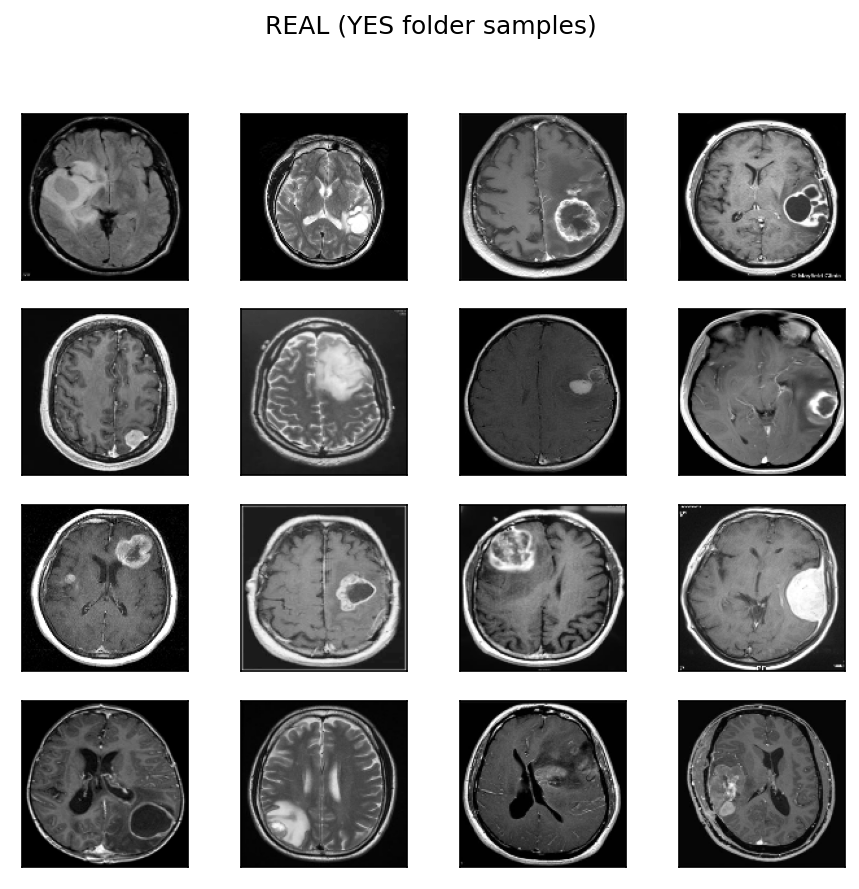

Preview — ALL index:


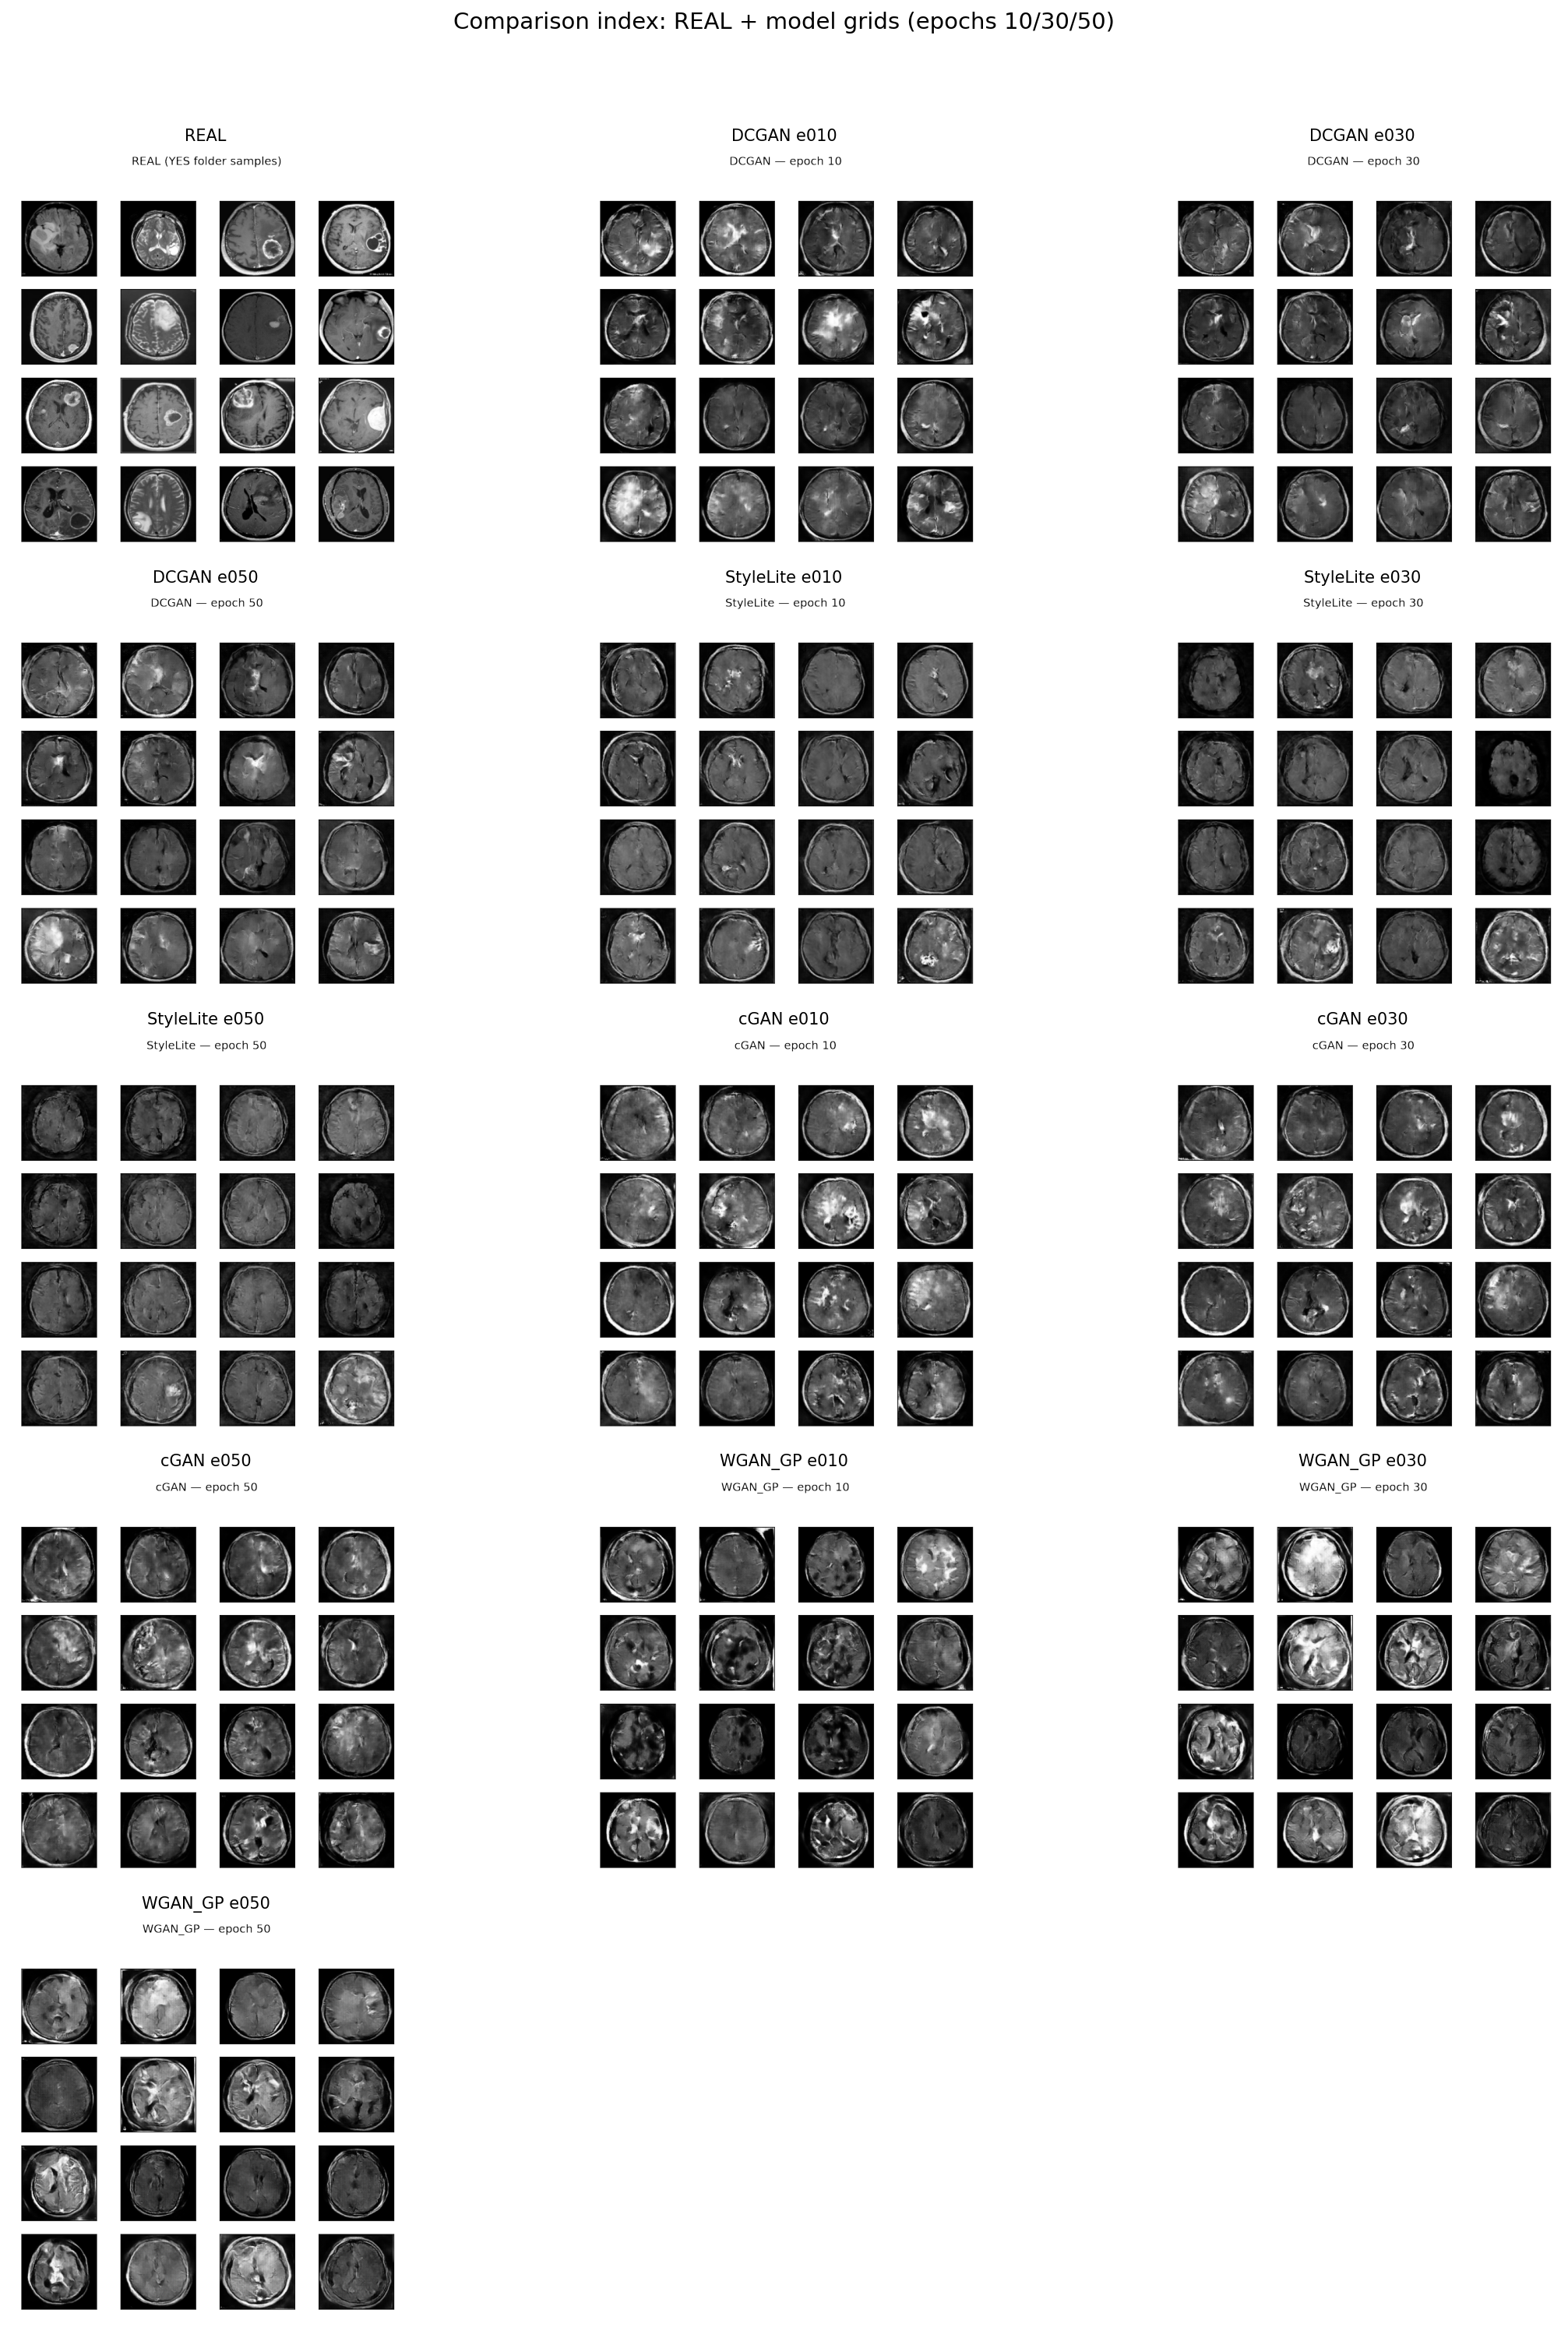

In [27]:
# === CMP-2 (labeled): sample grids for each GAN (10/30/50) + REAL, with clear titles & an index sheet ===
import os, math
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image, display

GRID_N = 16
z_fixed = np.random.RandomState(123).normal(0,1,(GRID_N, NOISE_DIM)).astype('float32')
y_dummy = np.ones((GRID_N,1), dtype=np.float32)  # single-class cGAN

GRIDS_DIR = os.path.join(COMPARE_DIR, "grids")
os.makedirs(GRIDS_DIR, exist_ok=True)

def save_grid_labeled(imgs, title, path, grid=(4,4), figsize=(6,6)):
    r,c = grid
    plt.figure(figsize=figsize)
    # Title bar
    plt.suptitle(title, fontsize=12, y=0.98)
    for i in range(min(r*c, imgs.shape[0])):
        ax = plt.subplot(r,c,i+1)
        im = imgs[i].squeeze()
        # bring to [0,1] for display
        ax.imshow((im*0.5+0.5), cmap='gray', vmin=0, vmax=1)
        ax.set_xticks([]); ax.set_yticks([])
    # leave space for title
    plt.tight_layout(rect=[0,0,1,0.95])
    plt.savefig(path, bbox_inches='tight', dpi=150)
    plt.close()

saved_items = []

# 1) Real grid (headlined)
rng_local = np.random.RandomState(123)
real_idx = rng_local.choice(X_train.shape[0], GRID_N, replace=False)
real_grid = X_train[real_idx]
real_title = "REAL (YES folder samples)"
real_path = os.path.join(GRIDS_DIR, "REAL_grid.png")
save_grid_labeled(real_grid, real_title, real_path, grid=(4,4), figsize=(6,6))
saved_items.append(("REAL", None, real_path))

print("Saved:", real_path)

# 2) Each model/epoch with headings
for model in MODELS:
    G = build_generator(model)
    for epoch in EPOCHS_TO_CHECK:
        wp = weights_path(model, epoch, "G")
        if not os.path.exists(wp):
            print(f"[{model}] Missing weights for epoch {epoch}: {wp} — skipping")
            continue
        try:
            G.load_weights(wp)
        except Exception as e:
            print(f"[{model}] load error @e{epoch}:", e)
            continue

        if model == "cGAN":
            imgs = G.predict([z_fixed, y_dummy], verbose=0)
        else:
            imgs = G.predict(z_fixed, verbose=0)

        title = f"{model} — epoch {epoch}"
        out_path = os.path.join(GRIDS_DIR, f"{model}_grid_e{epoch:03d}.png")
        save_grid_labeled(imgs, title, out_path, grid=(4,4), figsize=(6,6))
        saved_items.append((model, epoch, out_path))
        print("Saved:", out_path)

# 3) Build a labeled “index” contact sheet (REAL + all model/epochs)
#    This shows thumbnails of the above grids with titles for quick scanning.
thumbs = [real_path] + [p for (_,_,p) in saved_items if p != real_path]
labels = ["REAL"] + [f"{m} e{e:03d}" for (m,e,p) in saved_items if p != real_path]

n = len(thumbs)
cols = 3
rows = math.ceil(n / cols)

plt.figure(figsize=(cols*5, rows*4))
plt.suptitle("Comparison index: REAL + model grids (epochs 10/30/50)", fontsize=14, y=0.995)
for i, (img_path, lbl) in enumerate(zip(thumbs, labels), start=1):
    ax = plt.subplot(rows, cols, i)
    try:
        im = plt.imread(img_path)
        ax.imshow(im)
        ax.set_title(lbl, fontsize=10, pad=6)
    except Exception as e:
        ax.text(0.5, 0.5, f"Could not load\n{os.path.basename(img_path)}",
                ha='center', va='center', fontsize=10)
    ax.axis('off')

index_path = os.path.join(GRIDS_DIR, "ALL_index.png")
plt.tight_layout(rect=[0,0,1,0.97])
plt.savefig(index_path, bbox_inches='tight', dpi=150)
plt.close()

print("\nSaved index:", index_path)

# 4) Quick inline preview of REAL + index (the big sheet)
print("\nPreview — REAL grid:")
display(Image(real_path))
print("Preview — ALL index:")
display(Image(index_path))


# Compute FID/IS/SSIM/PSNR for epochs 10/30/50, plot & print winners

In [28]:
# === CMP-3: metrics for epochs 10/30/50; plots; winners ===
import json
from collections import defaultdict
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from skimage.metrics import structural_similarity as ssim_metric, peak_signal_noise_ratio as psnr_metric

# Inception models (will download once if needed)
INCEPT_POOL = InceptionV3(include_top=False, pooling='avg', input_shape=(299,299,3))
INCEPT_SOFT = InceptionV3(include_top=True, weights='imagenet')

def _prep299(x):
    # x in [-1,1], gray 1ch -> 3ch, 299, preprocess
    if x.shape[-1]==1:
        x = np.repeat(x, 3, axis=-1)
    x = (x + 1.) * 127.5  # to [0,255]
    x = tf.image.resize(x, (299,299)).numpy()
    return preprocess_input(x)

def activations_pool(images, batch=64):
    xs = _prep299(images); outs=[]
    for i in range(0, xs.shape[0], batch):
        outs.append(INCEPT_POOL.predict(xs[i:i+batch], verbose=0))
    return np.concatenate(outs, axis=0)

def inception_soft(images, batch=64):
    xs = _prep299(images); outs=[]
    for i in range(0, xs.shape[0], batch):
        outs.append(INCEPT_SOFT.predict(xs[i:i+batch], verbose=0))
    return np.concatenate(outs, axis=0)

def fid(real, fake):
    a1, a2 = activations_pool(real), activations_pool(fake)
    m1, m2 = a1.mean(0), a2.mean(0)
    s1, s2 = np.cov(a1, rowvar=False), np.cov(a2, rowvar=False)
    diff = m1 - m2
    covmean = tf.linalg.sqrtm(tf.cast(s1 @ s2, tf.complex64))
    covmean = tf.math.real(covmean)
    return float(diff.dot(diff) + np.trace(s1 + s2 - 2*covmean))

def inception_score(images, splits=5):
    p = inception_soft(images)
    N = p.shape[0]
    scores=[]
    for k in range(splits):
        part = p[k*N//splits:(k+1)*N//splits, :]
        py = part.mean(0)
        kl = (part * (np.log(part+1e-10) - np.log(py+1e-10))).sum(1)
        scores.append(np.exp(np.mean(kl)))
    return float(np.mean(scores))

def ssim_psnr(real, fake, n=100):
    n = min(n, real.shape[0], fake.shape[0])
    idx_r = np.random.choice(real.shape[0], n, replace=False)
    idx_f = np.random.choice(fake.shape[0], n, replace=False)
    ssim_list, psnr_list = [], []
    for ir, ifa in zip(idx_r, idx_f):
        r = (real[ir].squeeze()+1.)/2.0
        f = (fake[ifa].squeeze()+1.)/2.0
        ssim_list.append(ssim_metric(r, f, data_range=1.0))
        psnr_list.append(psnr_metric(r, f, data_range=1.0))
    return float(np.mean(ssim_list)), float(np.mean(psnr_list))

# We’ll compute with N=128 for speed
N_SAMPLES = min(128, X_train.shape[0])
rng = np.random.RandomState(999)
real_pool = X_train[rng.choice(X_train.shape[0], N_SAMPLES, replace=False)]
z_eval = rng.normal(0,1,(N_SAMPLES, NOISE_DIM)).astype('float32')
y_eval = np.ones((N_SAMPLES,1), dtype=np.float32)

results = []
for model in MODELS:
    G = build_generator(model)
    for epoch in EPOCHS_TO_CHECK:
        wp = weights_path(model, epoch, "G")
        if not os.path.exists(wp):
            print(f"[{model}] skip e{epoch} (weights not found)."); continue
        try:
            G.load_weights(wp)
        except Exception as e:
            print(f"[{model}] load error e{epoch}:", e); continue
        # generate N_SAMPLES
        if model=="cGAN":
            fake = G.predict([z_eval, y_eval], verbose=0)
        else:
            fake = G.predict(z_eval, verbose=0)
        # metrics
        try:
            FID = fid(real_pool, fake)
        except Exception as e:
            print(f"[{model}] FID error @e{epoch}:", e); FID = None
        try:
            IS = inception_score(fake, splits=5)
        except Exception as e:
            print(f"[{model}] IS error @e{epoch}:", e); IS = None
        SSIM, PSNR = ssim_psnr(real_pool, fake, n=min(100, N_SAMPLES))
        rec = {"model": model, "epoch": epoch, "FID": FID, "IS": IS, "SSIM": SSIM, "PSNR": PSNR}
        results.append(rec)
        # save JSON per model/epoch
        with open(os.path.join(COMPARE_DIR, "metrics", f"{model}_e{epoch:03d}.json"), "w") as f:
            json.dump(rec, f)
        print(rec)

# Save CSV summary
import csv, pandas as pd
csv_path = os.path.join(COMPARE_DIR, "metrics", "summary.csv")
with open(csv_path, "w", newline="") as f:
    w = csv.DictWriter(f, fieldnames=["model","epoch","FID","IS","SSIM","PSNR"])
    w.writeheader()
    for r in results: w.writerow(r)
print("Saved:", csv_path)

df = pd.DataFrame(results).sort_values(["epoch","model"])
display(df)

# ---------- Plots ----------
def plot_metric(metric, ylabel, higher_is_better, fname):
    plt.figure(figsize=(8,5))
    colors = {"DCGAN":None,"StyleLite":None,"cGAN":None,"WGAN_GP":None}
    for m in MODELS:
        d = df[df.model==m]
        if d.empty: continue
        plt.plot(d.epoch, d[metric], marker='o', label=m)
    plt.xlabel("Epoch"); plt.ylabel(ylabel); plt.title(metric+" across models")
    plt.grid(True, alpha=0.3); plt.legend()
    outp = os.path.join(COMPARE_DIR, "plots", fname)
    plt.savefig(outp, bbox_inches='tight'); plt.close()
    print("Saved plot:", outp)

plot_metric("FID", "FID (lower is better)", False, "cmp_FID.png")
plot_metric("IS", "Inception Score (higher is better)", True, "cmp_IS.png")
plot_metric("SSIM", "SSIM (higher is better)", True, "cmp_SSIM.png")

# ---------- Winners per epoch ----------
def rank_epoch(dfe):
    # lower FID better; higher others better
    ranks = {}
    # normalize ranks per metric
    for metric, asc in [("FID", True), ("IS", False), ("SSIM", False), ("PSNR", False)]:
        sub = dfe.dropna(subset=[metric]).copy()
        if sub.empty: continue
        sub["r_"+metric] = sub[metric].rank(ascending=asc, method="min")
        for _, row in sub.iterrows():
            ranks.setdefault(row["model"], 0)
            ranks[row["model"]] += row["r_"+metric]
    if not ranks: return None
    best = sorted(ranks.items(), key=lambda x: x[1])[0]  # lowest total rank wins
    return best, ranks

print("\n=== Winners by epoch ===")
for e in EPOCHS_TO_CHECK:
    dfe = df[df.epoch==e]
    out = rank_epoch(dfe)
    if out is None:
        print(f"Epoch {e}: no metrics"); continue
    (winner, win_score), ranks = out
    print(f"Epoch {e}: winner = {winner} (rank sum {win_score:.1f}) | ranks:", ranks)

# Overall (e=50 preferred if exists; else across all)
df50 = df[df.epoch==50]
target_df = df50 if not df50.empty else df
out = rank_epoch(target_df)
if out is not None:
    (winner, win_score), ranks = out
    print(f"\n=== Overall winner ({'epoch 50' if not df50.empty else 'all epochs'}) ===")
    print(f"{winner} with rank sum {win_score:.1f}")
else:
    print("\nNo metrics to compute overall winner.")


{'model': 'DCGAN', 'epoch': 10, 'FID': 117.43461608886719, 'IS': 1.656053900718689, 'SSIM': 0.15851084358641632, 'PSNR': 11.640921662406178}
{'model': 'DCGAN', 'epoch': 30, 'FID': 113.57225799560547, 'IS': 1.6298290491104126, 'SSIM': 0.15232127416275193, 'PSNR': 12.14990098751311}
{'model': 'DCGAN', 'epoch': 50, 'FID': 119.69964599609375, 'IS': 1.7129043340682983, 'SSIM': 0.14366906175443822, 'PSNR': 12.342036709136499}
{'model': 'StyleLite', 'epoch': 10, 'FID': 128.7206268310547, 'IS': 1.5969070196151733, 'SSIM': 0.15512932271336702, 'PSNR': 11.859466255960957}
{'model': 'StyleLite', 'epoch': 30, 'FID': 157.26443481445312, 'IS': 1.7384811639785767, 'SSIM': 0.15986795845613247, 'PSNR': 12.542807538482796}
{'model': 'StyleLite', 'epoch': 50, 'FID': 186.80429077148438, 'IS': 1.731020212173462, 'SSIM': 0.1367753094064894, 'PSNR': 12.935271872251551}
{'model': 'cGAN', 'epoch': 10, 'FID': 148.37106323242188, 'IS': 1.6554374694824219, 'SSIM': 0.1599200204256449, 'PSNR': 11.574015818653457}
{

model  epoch         FID        IS      SSIM       PSNR
0       DCGAN     10  117.434616  1.656054  0.158511  11.640922
3   StyleLite     10  128.720627  1.596907  0.155129  11.859466
9     WGAN_GP     10  138.080139  2.063252  0.155983  11.380837
6        cGAN     10  148.371063  1.655437  0.159920  11.574016
1       DCGAN     30  113.572258  1.629829  0.152321  12.149901
4   StyleLite     30  157.264435  1.738481  0.159868  12.542808
10    WGAN_GP     30  117.308174  1.755519  0.138779  10.513067
7        cGAN     30  141.818054  1.730793  0.151925  11.751391
2       DCGAN     50  119.699646  1.712904  0.143669  12.342037
5   StyleLite     50  186.804291  1.731020  0.136775  12.935272
11    WGAN_GP     50  122.189392  1.985203  0.164233  11.479014
8        cGAN     50  128.000946  1.672914  0.157240  11.924369

Saved plot: /kaggle/working/gan_mri_outputs/comparison/plots/cmp_FID.png
Saved plot: /kaggle/working/gan_mri_outputs/comparison/plots/cmp_IS.png
Saved plot: /kaggle/working/gan_mri_outputs/comparison/plots/cmp_SSIM.png

=== Winners by epoch ===
Epoch 10: winner = DCGAN (rank sum 7.0) | ranks: {'DCGAN': 7.0, 'StyleLite': 11.0, 'WGAN_GP': 11.0, 'cGAN': 11.0}
Epoch 30: winner = StyleLite (rank sum 8.0) | ranks: {'DCGAN': 9.0, 'StyleLite': 8.0, 'WGAN_GP': 11.0, 'cGAN': 12.0}
Epoch 50: winner = WGAN_GP (rank sum 8.0) | ranks: {'DCGAN': 9.0, 'StyleLite': 11.0, 'WGAN_GP': 8.0, 'cGAN': 12.0}

=== Overall winner (epoch 50) ===
WGAN_GP with rank sum 8.0


# Degrid all sample/comparison grids into single images (tagged)

In [29]:
# === Cell S1: Split all grid PNGs into single 128x128 images with tagged filenames ===
import os, re, glob, math
import numpy as np
import cv2
from tqdm import tqdm

BASE_OUT   = "/kaggle/working/gan_mri_outputs"
SOURCES    = [
    os.path.join(BASE_OUT, "DCGAN",    "samples"),
    os.path.join(BASE_OUT, "StyleLite","samples"),
    os.path.join(BASE_OUT, "cGAN",     "samples"),
    os.path.join(BASE_OUT, "WGAN_GP",  "samples"),
    os.path.join(BASE_OUT, "comparison","grids"),
]
OUT_DIR    = os.path.join(BASE_OUT, "single_images")
os.makedirs(OUT_DIR, exist_ok=True)

# Try these grid layouts (we used 4x4 during training, 8x8 for finals, plus a few fallbacks)
CANDIDATE_GRIDS = [(8,8), (4,4), (2,5), (10,10)]

# Parse model / epoch from filename
def parse_tags(path):
    base = os.path.basename(path)
    # Matches e.g. DCGAN_epoch034.png / StyleLite_epoch050.png / WGAN_GP_epoch010.png
    m = re.search(r'^(DCGAN|StyleLite|cGAN|WGAN_GP).*?epoch[_-]?(\d+)', base, re.IGNORECASE)
    if m:
        return m.group(1), int(m.group(2))
    # Comparison grids: Model_grid_e010.png
    m = re.search(r'^(DCGAN|StyleLite|cGAN|WGAN_GP).*?_grid.*?e(\d+)', base, re.IGNORECASE)
    if m:
        return m.group(1), int(m.group(2))
    # REAL grid
    if base.lower().startswith("real"):
        return "REAL", None
    # Fallback
    return "UNKNOWN", None

def load_rgb(path):
    im = cv2.imread(path, cv2.IMREAD_UNCHANGED)
    if im is None:
        return None
    # If has alpha, drop it; convert to RGB
    if im.ndim == 3 and im.shape[2] == 4:
        im = cv2.cvtColor(im, cv2.COLOR_BGRA2BGR)
    elif im.ndim == 2:
        im = cv2.cvtColor(im, cv2.COLOR_GRAY2BGR)
    else:
        im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    return im

def try_split_grid(img, grid):
    H, W = img.shape[:2]
    r, c = grid
    tile_h = H // r
    tile_w = W // c
    if tile_h < 8 or tile_w < 8:
        return None  # nonsense
    cut_h = tile_h * r
    cut_w = tile_w * c
    crop = img[0:cut_h, 0:cut_w]
    tiles = []
    # small inner trim to kill subplot lines/borders
    trim = max(0, min(tile_h, tile_w)//64)  # ~1-2 px for typical sizes
    for i in range(r):
        for j in range(c):
            y0 = i*tile_h; y1 = (i+1)*tile_h
            x0 = j*tile_w; x1 = (j+1)*tile_w
            t = crop[y0:y1, x0:x1]
            if trim > 0 and t.shape[0] > 2*trim and t.shape[1] > 2*trim:
                t = t[trim:-trim, trim:-trim]
            tiles.append(t)
    return tiles

def to_128_gray(tile_rgb):
    g = cv2.cvtColor(tile_rgb, cv2.COLOR_RGB2GRAY)
    g = cv2.resize(g, (128,128), interpolation=cv2.INTER_AREA)
    return g

# Collect all PNGs from sources
all_pngs = []
for s in SOURCES:
    if os.path.isdir(s):
        all_pngs.extend(sorted(glob.glob(os.path.join(s, "*.png"))))
all_pngs = sorted(set(all_pngs))
print(f"Found {len(all_pngs)} grid image(s) to split.")

saved = 0
skipped = 0

for path in tqdm(all_pngs, desc="Degridding"):
    img = load_rgb(path)
    if img is None:
        print("  ! could not read:", path)
        skipped += 1
        continue

    tiles = None
    for grid in CANDIDATE_GRIDS:
        tiles = try_split_grid(img, grid)
        if tiles is None: 
            continue
        # heuristic: tiles count must be at least 4 and not produce ultra-thin tiles
        if len(tiles) >= 4:
            # accept this grid
            break

    if not tiles:
        print("  ! no suitable grid split:", path)
        skipped += 1
        continue

    model, epoch = parse_tags(path)
    # Keep only non-empty tiles (some corner cases may be blank due to tight layout)
    idx = 1
    for t in tiles:
        if t is None or t.size == 0:
            continue
        g128 = to_128_gray(t)
        if model == "REAL":
            out_name = f"REAL_tile{idx:03d}.png"
        elif model == "UNKNOWN":
            stem = os.path.splitext(os.path.basename(path))[0]
            out_name = f"{stem}_tile{idx:03d}.png"
        else:
            if epoch is None:
                out_name = f"{model}_eXXX_tile{idx:03d}.png"
            else:
                out_name = f"{model}_e{epoch:03d}_tile{idx:03d}.png"
        cv2.imwrite(os.path.join(OUT_DIR, out_name), g128)
        saved += 1
        idx += 1

print(f"\nSaved {saved} single-image tile(s) to: {OUT_DIR}")
if skipped:
    print(f"Skipped {skipped} grid(s) due to read/split issues.")


Found 218 grid image(s) to split.


Degridding: 100%|██████████| 218/218 [00:08<00:00, 26.89it/s]


Saved 13952 single-image tile(s) to: /kaggle/working/gan_mri_outputs/single_images


# Zip the singles folder and create a solid,

In [30]:
# === Cell S2: Zip single_images and provide a reliable download link ===
import os, zipfile, time, shutil
from IPython.display import FileLink, display

SRC_DIR = "/kaggle/working/gan_mri_outputs/single_images"
assert os.path.isdir(SRC_DIR), f"Not found: {SRC_DIR}. Run Cell S1 first."

zip_name = f"single_images_{int(time.time())}.zip"
zip_path = os.path.join("/kaggle/working/exports", zip_name)
os.makedirs("/kaggle/working/exports", exist_ok=True)

print("Creating ZIP:", zip_path)
with zipfile.ZipFile(zip_path, "w", compression=zipfile.ZIP_DEFLATED) as zf:
    root_len = len(SRC_DIR.rstrip(os.sep)) + 1
    count = 0
    for root, _, files in os.walk(SRC_DIR):
        for f in files:
            ab = os.path.join(root, f)
            arc = ab[root_len:]
            zf.write(ab, arcname=arc)
            count += 1
print("Added files:", count)

# Move next to notebook for a reliable relative link (prevents 404)
dst_name = os.path.basename(zip_path).replace(" ", "_")
dst_path = os.path.join(os.getcwd(), dst_name)
if os.path.abspath(zip_path) != os.path.abspath(dst_path):
    shutil.move(zip_path, dst_path)
    print("Moved to notebook folder:", dst_path)
else:
    print("Already in notebook folder:", dst_path)

print("Size: %.2f MB" % (os.path.getsize(dst_path)/1e6))
display(FileLink(dst_name, result_html_prefix="⬇️ Download singles ZIP: "))


Creating ZIP: /kaggle/working/exports/single_images_1755466626.zip
Added files: 12928
Moved to notebook folder: /kaggle/working/single_images_1755466626.zip
Size: 106.73 MB


/kaggle/working/single_images_1755466626.zip

# Comparison Download

In [31]:
# === CZ: Zip the comparison folder and create a reliable download link ===
import os, zipfile, time, shutil, hashlib
from IPython.display import FileLink, display

COMP_DIR = "/kaggle/working/gan_mri_outputs/comparison"  # your path
EXPORTS  = "/kaggle/working/exports"
assert os.path.isdir(COMP_DIR), f"Not found: {COMP_DIR}"

os.makedirs(EXPORTS, exist_ok=True)
zip_name = f"comparison_{int(time.time())}.zip"
zip_path = os.path.join(EXPORTS, zip_name)

# Create the zip (compressed) from COMP_DIR
count = 0
with zipfile.ZipFile(zip_path, "w", compression=zipfile.ZIP_DEFLATED) as zf:
    root_len = len(COMP_DIR.rstrip(os.sep)) + 1
    for root, _, files in os.walk(COMP_DIR):
        for f in files:
            abspath = os.path.join(root, f)
            arcname = abspath[root_len:]  # relative path inside the zip
            zf.write(abspath, arcname=arcname)
            count += 1
print(f"Zipped {count} file(s).")

# Move the zip next to the notebook for a reliable relative link (avoids 404)
dst_name = os.path.basename(zip_path).replace(" ", "_")
dst_path = os.path.join(os.getcwd(), dst_name)
if os.path.abspath(zip_path) != os.path.abspath(dst_path):
    shutil.move(zip_path, dst_path)
    print("Moved ZIP to notebook folder:", dst_path)
else:
    print("ZIP already in notebook folder:", dst_path)

# Show size + a quick MD5 checksum
def md5sum(path, block=2**20):
    h = hashlib.md5()
    with open(path, "rb") as f:
        while True:
            b = f.read(block)
            if not b: break
            h.update(b)
    return h.hexdigest()

print("ZIP size: %.2f MB" % (os.path.getsize(dst_path)/1e6))
print("MD5:", md5sum(dst_path))

# Solid download link (relative path)
display(FileLink(dst_name, result_html_prefix="⬇️ Download comparison ZIP: "))


Zipped 30 file(s).
Moved ZIP to notebook folder: /kaggle/working/comparison_1755466845.zip
ZIP size: 8.51 MB
MD5: 8abe89b8ad0ec46c7bca454d1d2d16b8


/kaggle/working/comparison_1755466845.zip

In [35]:
# === DIRECT SAMPLER: generate full single images from trained generators (no grid slicing) ===
import os, re, glob, time, zipfile, shutil
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Dense, Reshape, Conv2DTranspose, Conv2D, LeakyReLU, UpSampling2D
from tensorflow.keras.layers import Embedding, Flatten, Multiply, Activation
from IPython.display import FileLink, display

# ---- constants (must match your training) ----
WIDTH, HEIGHT, CHANNELS = 128, 128, 1
NOISE_DIM = 100
BASE_DIR = "/kaggle/working/gan_mri_outputs"
EXPORTS  = "/kaggle/working/exports"
os.makedirs(EXPORTS, exist_ok=True)

# Which models & epochs to export
MODELS = ["DCGAN", "StyleLite", "cGAN", "WGAN_GP"]   # order optional
EPOCHS_TO_SAVE = [10, 30, 50]                       # add 34/35/etc if you want
NUM_PER_EPOCH = 155                                 # how many singles per epoch
BATCH_GEN = 64                                      # sample batch size
OUT_ROOT = os.path.join(BASE_DIR, "singles_direct")
os.makedirs(OUT_ROOT, exist_ok=True)

# ---- paths ----
def wdir(model): return os.path.join(BASE_DIR, model, "weights")
def gpath(model, epoch):
    tag = f"{model}_G_e{epoch:03d}.h5"
    if model == "WGAN_GP": tag = f"WGAN_GP_G_e{epoch:03d}.h5"
    return os.path.join(wdir(model), tag)

# ---- same generator bodies as training ----
def build_dcgan_G():
    z = Input(shape=(NOISE_DIM,))
    x = Dense(32*32*256)(z); x = LeakyReLU(0.2)(x)
    x = Reshape((32,32,256))(x)
    x = Conv2DTranspose(128, (4,4), strides=2, padding='same')(x); x = LeakyReLU(0.2)(x)
    x = Conv2DTranspose(128, (4,4), strides=2, padding='same')(x); x = LeakyReLU(0.2)(x)
    out = Conv2D(CHANNELS, (4,4), padding='same', activation='tanh')(x)
    return Model(z, out, name="DCGAN_G")

def ada_instance_norm(x, style):
    ch = x.shape[-1]
    scale = Dense(ch)(style); bias = Dense(ch)(style)
    m, v = tf.nn.moments(x, axes=[1,2], keepdims=True)
    x_norm = (x - m) / tf.sqrt(v + 1e-8)
    scale = tf.reshape(scale, [-1,1,1,ch]); bias = tf.reshape(bias, [-1,1,1,ch])
    return scale * x_norm + bias

def style_block(x, w, f):
    x = Conv2D(f, 3, padding='same')(x); x = LeakyReLU(0.2)(x)
    return ada_instance_norm(x, w)

def build_stylelite_G():
    z = Input(shape=(NOISE_DIM,))
    w = Dense(256, activation='relu')(z); w = Dense(256, activation='relu')(w); w = Dense(256, activation='relu')(w)
    x = Dense(32*32*256)(z); x = Reshape((32,32,256))(x)
    x = style_block(x, w, 256)
    x = UpSampling2D()(x); x = style_block(x, w, 128)
    x = UpSampling2D()(x); x = style_block(x, w, 128)
    out = Conv2D(CHANNELS, 3, padding='same', activation='tanh')(x)
    return Model(z, out, name="StyleLite_G")

def build_cgan_G(num_classes=1):
    z = Input(shape=(NOISE_DIM,))
    y = Input(shape=(1,), dtype='float32')
    if num_classes > 1:
        emb = Embedding(num_classes, NOISE_DIM)(tf.cast(y, tf.int32))
        emb = Flatten()(emb)
        zi  = Multiply()([z, emb])
    else:
        zi = z
    x = Dense(32*32*256)(zi); x = LeakyReLU(0.2)(x)
    x = Reshape((32,32,256))(x)
    x = Conv2DTranspose(128, (4,4), strides=2, padding='same')(x); x = LeakyReLU(0.2)(x)
    x = Conv2DTranspose(128, (4,4), strides=2, padding='same')(x); x = LeakyReLU(0.2)(x)
    out = Conv2D(CHANNELS, (4,4), padding='same', activation='tanh')(x)
    return Model([z, y], out, name="cGAN_G")

def build_wgan_G():  # same body as DCGAN G
    return build_dcgan_G()

# ---- sampling helpers ----
def to_uint8(x):  # [-1,1] -> uint8
    x = (x + 1.0) * 127.5
    x = np.clip(x, 0, 255).astype(np.uint8)
    return x

def qc_not_blank(img):
    # reject nearly blank outputs (tiny variance or tiny foreground)
    g = img.squeeze()
    if g.std() < 3:  # too flat
        return False
    thr, bw = cv2.threshold(g, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    if (bw>0).mean() < 0.15:  # <15% foreground
        return False
    return True

def ensure_dir(p):
    if not os.path.isdir(p): os.makedirs(p, exist_ok=True)

# ---- generate singles for each model/epoch ----
summary = []
for model in MODELS:
    print(f"\n=== {model} ===")
    # pick builder
    if model == "DCGAN":      G = build_dcgan_G()
    elif model == "StyleLite":G = build_stylelite_G()
    elif model == "cGAN":     G = build_cgan_G(num_classes=1)  # single-class
    elif model == "WGAN_GP":  G = build_wgan_G()
    else: continue

    for epoch in EPOCHS_TO_SAVE:
        wp = gpath(model, epoch)
        if not os.path.exists(wp):
            print(f"  - Skipping e{epoch:03d} (weights not found): {wp}")
            continue

        # load weights
        try:
            G.load_weights(wp)
        except Exception as e:
            print(f"  - Load error @ e{epoch:03d}: {e}")
            continue

        out_dir = os.path.join(OUT_ROOT, model, f"e{epoch:03d}")
        ensure_dir(out_dir)

        saved = 0
        tries = 0
        needed = NUM_PER_EPOCH
        while saved < needed and tries < needed*4:
            # sample a batch
            m = min(BATCH_GEN, needed - saved)
            z = np.random.normal(0,1,(m, NOISE_DIM)).astype('float32')
            if model == "cGAN":
                y = np.ones((m,1), dtype=np.float32)  # single class label
                imgs = G.predict([z, y], verbose=0)
            else:
                imgs = G.predict(z, verbose=0)

            imgs = to_uint8(imgs)  # (m,128,128,1)
            for i in range(m):
                im = imgs[i]
                if not qc_not_blank(im):
                    tries += 1
                    continue
                fname = f"{model}_e{epoch:03d}_{saved+1:04d}.jpg"
                cv2.imwrite(os.path.join(out_dir, fname), im.squeeze(), [int(cv2.IMWRITE_JPEG_QUALITY), 95])
                saved += 1
                if saved >= needed: break

        print(f"  - e{epoch:03d}: saved {saved} singles → {out_dir}")
        summary.append((model, epoch, saved))

# ---- zip & download link (solid) ----
stamp = int(time.time())
zip_name = f"singles_direct_{stamp}.zip"
zip_path = os.path.join(EXPORTS, zip_name)
print("\nZipping singles to:", zip_path)

with zipfile.ZipFile(zip_path, "w", compression=zipfile.ZIP_DEFLATED) as zf:
    root_len = len(OUT_ROOT.rstrip(os.sep)) + 1
    n = 0
    for root, _, files in os.walk(OUT_ROOT):
        for f in files:
            ab = os.path.join(root, f)
            arc = ab[root_len:]
            zf.write(ab, arcname=arc)
            n += 1
print("  files:", n)

# move next to notebook for a non-404 link
dst_name = os.path.basename(zip_path)
dst_path = os.path.join(os.getcwd(), dst_name)
if os.path.abspath(zip_path) != os.path.abspath(dst_path):
    shutil.move(zip_path, dst_path)
    print("Moved ZIP →", dst_path)
else:
    print("ZIP already next to notebook.")

print("\nSummary:")
for m,e,c in summary:
    print(f"  {m} e{e:03d}: {c} images")

# reliable download link
display(FileLink(dst_name, result_html_prefix="⬇️ Download singles_direct ZIP: "))



=== DCGAN ===
  - e010: saved 155 singles → /kaggle/working/gan_mri_outputs/singles_direct/DCGAN/e010
  - e030: saved 155 singles → /kaggle/working/gan_mri_outputs/singles_direct/DCGAN/e030
  - e050: saved 155 singles → /kaggle/working/gan_mri_outputs/singles_direct/DCGAN/e050

=== StyleLite ===
  - Load error @ e010: You are trying to load a weight file containing 13 layers into a model with 14 layers.
  - Load error @ e030: You are trying to load a weight file containing 13 layers into a model with 14 layers.
  - Load error @ e050: You are trying to load a weight file containing 13 layers into a model with 14 layers.

=== cGAN ===
  - e010: saved 155 singles → /kaggle/working/gan_mri_outputs/singles_direct/cGAN/e010
  - e030: saved 155 singles → /kaggle/working/gan_mri_outputs/singles_direct/cGAN/e030
  - e050: saved 155 singles → /kaggle/working/gan_mri_outputs/singles_direct/cGAN/e050

=== WGAN_GP ===
  - e010: saved 155 singles → /kaggle/working/gan_mri_outputs/singles_direct/WGA

/kaggle/working/singles_direct_1755468489.zip

# stylite images

In [36]:
# === StyleLite-only: direct sampling → singles → ZIP (solid link) =================
import os, time, shutil, zipfile
import numpy as np, cv2, tensorflow as tf
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Dense, Reshape, Conv2DTranspose, Conv2D, LeakyReLU, UpSampling2D
from IPython.display import FileLink, display

# ---- constants (match training) ----
WIDTH, HEIGHT, CHANNELS = 128, 128, 1
NOISE_DIM = 100
BASE_DIR  = "/kaggle/working/gan_mri_outputs"
EXPORTS   = "/kaggle/working/exports"
os.makedirs(EXPORTS, exist_ok=True)

EPOCHS_TO_SAVE = [10, 30, 50]   # add/remove as you like
NUM_PER_EPOCH  = 155            # how many singles per epoch
BATCH_GEN      = 64             # batch size for sampling

def ensure_dir(p): 
    os.makedirs(p, exist_ok=True)

def to_uint8(x):
    x = (x + 1.0) * 127.5
    return np.clip(x, 0, 255).astype(np.uint8)

def qc_not_blank(img):
    g = img.squeeze()
    if g.std() < 3: 
        return False
    _, bw = cv2.threshold(g, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    if (bw > 0).mean() < 0.15:
        return False
    return True

# ---- StyleLite generator (exact same body as training) ----
def ada_instance_norm(x, style):
    ch = x.shape[-1]
    scale = Dense(ch)(style)
    bias  = Dense(ch)(style)
    m, v = tf.nn.moments(x, axes=[1,2], keepdims=True)
    x_norm = (x - m) / tf.sqrt(v + 1e-8)
    scale = tf.reshape(scale, [-1,1,1,ch])
    bias  = tf.reshape(bias,  [-1,1,1,ch])
    return scale * x_norm + bias

def style_block(x, w, filters):
    x = Conv2D(filters, 3, padding='same')(x)
    x = LeakyReLU(0.2)(x)
    x = ada_instance_norm(x, w)
    return x

def build_stylelite_G():
    z = Input(shape=(NOISE_DIM,))
    # mapping network (2 layers, same as training)
    w = Dense(256, activation='relu')(z)
    w = Dense(256, activation='relu')(w)
    # constant/input path
    x = Dense(32*32*256)(z)
    x = Reshape((32,32,256))(x)
    x = style_block(x, w, 256)
    x = UpSampling2D()(x)
    x = style_block(x, w, 128)
    x = UpSampling2D()(x)
    x = style_block(x, w, 128)
    out = Conv2D(CHANNELS, 3, padding='same', activation='tanh')(x)
    return Model(z, out, name="StyleLite_G")

def stylelite_wpath(epoch):
    return os.path.join(BASE_DIR, "StyleLite", "weights", f"StyleLite_G_e{epoch:03d}.h5")

OUT_ROOT = os.path.join(BASE_DIR, "singles_direct", "StyleLite")
ensure_dir(OUT_ROOT)

summary = []
G = build_stylelite_G()

for epoch in EPOCHS_TO_SAVE:
    wp = stylelite_wpath(epoch)
    if not os.path.exists(wp):
        print(f"[StyleLite] skip e{epoch:03d} (weights not found): {wp}")
        continue

    # load weights
    try:
        G.load_weights(wp)
    except Exception as e:
        print(f"[StyleLite] load error @ e{epoch:03d}: {e}")
        continue

    out_dir = os.path.join(OUT_ROOT, f"e{epoch:03d}")
    ensure_dir(out_dir)

    saved, tries, needed = 0, 0, NUM_PER_EPOCH
    while saved < needed and tries < needed*4:
        m = min(BATCH_GEN, needed - saved)
        z = np.random.normal(0, 1, (m, NOISE_DIM)).astype('float32')
        imgs = G.predict(z, verbose=0)
        imgs = to_uint8(imgs)

        for i in range(m):
            im = imgs[i]
            if not qc_not_blank(im):
                tries += 1
                continue
            fname = f"StyleLite_e{epoch:03d}_{saved+1:04d}.jpg"
            cv2.imwrite(os.path.join(out_dir, fname), im.squeeze(), [int(cv2.IMWRITE_JPEG_QUALITY), 95])
            saved += 1
            if saved >= needed: break

    print(f"[StyleLite] e{epoch:03d}: saved {saved} singles → {out_dir}")
    summary.append((epoch, saved))

# ---- zip just StyleLite singles and give a solid download link ----
stamp = int(time.time())
zip_name = f"StyleLite_singles_direct_{stamp}.zip"
zip_path = os.path.join(EXPORTS, zip_name)
print("\nZipping:", zip_path)

with zipfile.ZipFile(zip_path, "w", compression=zipfile.ZIP_DEFLATED) as zf:
    root_len = len(OUT_ROOT.rstrip(os.sep)) + 1
    count = 0
    for root, _, files in os.walk(OUT_ROOT):
        for f in files:
            ab = os.path.join(root, f)
            arc = ab[root_len:]
            zf.write(ab, arcname=arc); count += 1
print("Files in ZIP:", count)

dst_name = os.path.basename(zip_path)
dst_path = os.path.join(os.getcwd(), dst_name)
if os.path.abspath(zip_path) != os.path.abspath(dst_path):
    shutil.move(zip_path, dst_path)
    print("Moved ZIP →", dst_path)
else:
    print("ZIP already next to notebook.")

print("\nSummary:")
for e, c in summary:
    print(f"  StyleLite e{e:03d}: {c} images")

display(FileLink(dst_name, result_html_prefix="⬇️ Download StyleLite singles ZIP: "))
# ================================================================================


[StyleLite] e010: saved 155 singles → /kaggle/working/gan_mri_outputs/singles_direct/StyleLite/e010
[StyleLite] e030: saved 155 singles → /kaggle/working/gan_mri_outputs/singles_direct/StyleLite/e030
[StyleLite] e050: saved 155 singles → /kaggle/working/gan_mri_outputs/singles_direct/StyleLite/e050

Zipping: /kaggle/working/exports/StyleLite_singles_direct_1755468791.zip
Files in ZIP: 465
Moved ZIP → /kaggle/working/StyleLite_singles_direct_1755468791.zip

Summary:
  StyleLite e010: 155 images
  StyleLite e030: 155 images
  StyleLite e050: 155 images


/kaggle/working/StyleLite_singles_direct_1755468791.zip

# Prints

## cGAN/e010  —  155 image(s)

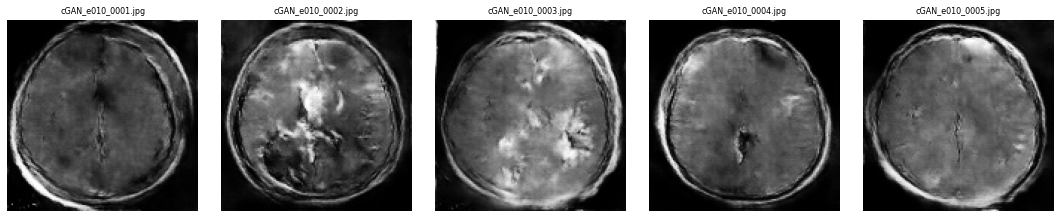

## cGAN/e030  —  155 image(s)

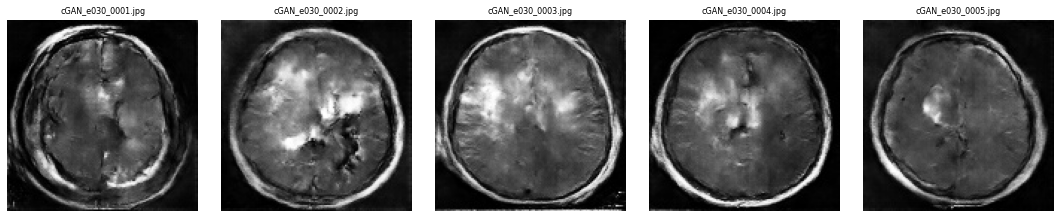

## cGAN/e050  —  155 image(s)

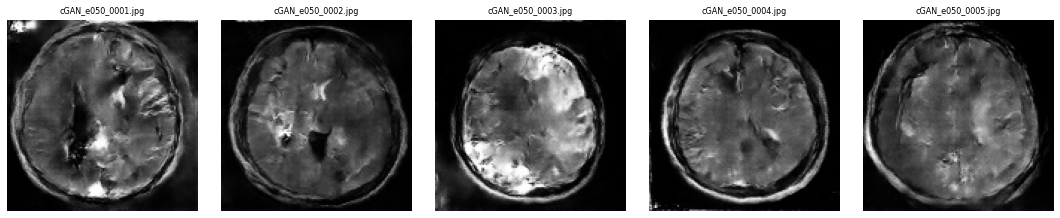

## DCGAN/e010  —  155 image(s)

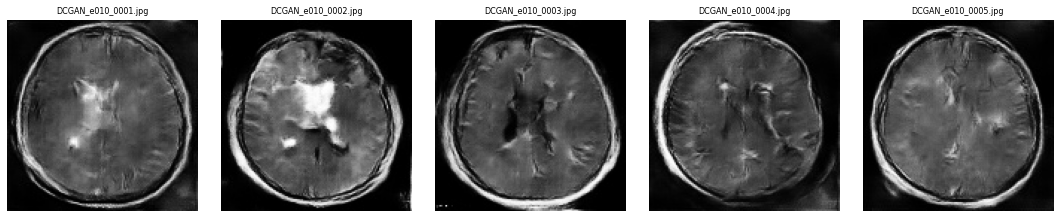

## DCGAN/e030  —  155 image(s)

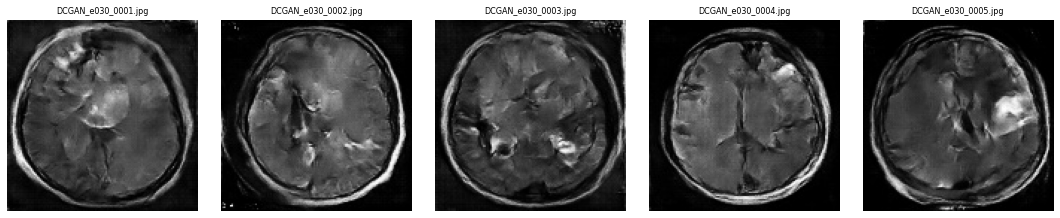

## DCGAN/e050  —  155 image(s)

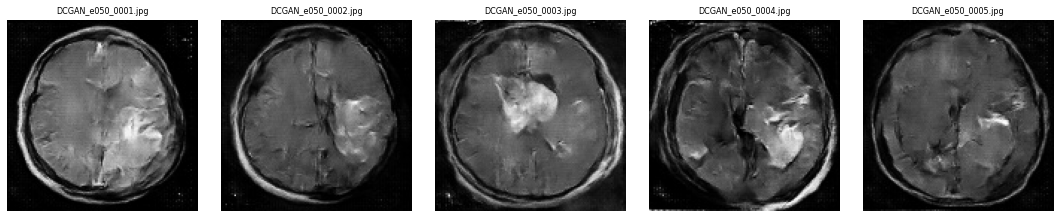

## StyleLite/e010  —  155 image(s)

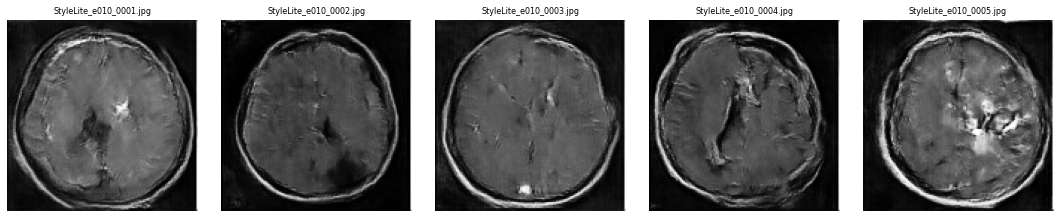

## StyleLite/e030  —  155 image(s)

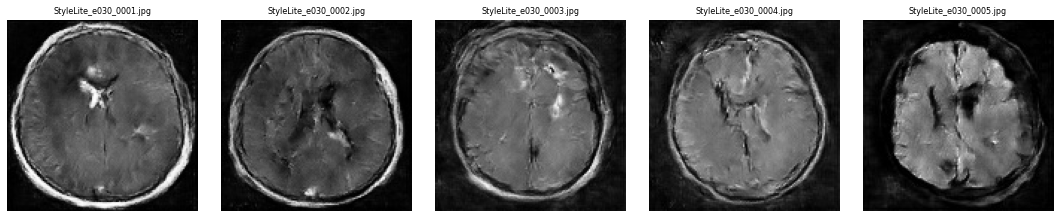

## StyleLite/e050  —  155 image(s)

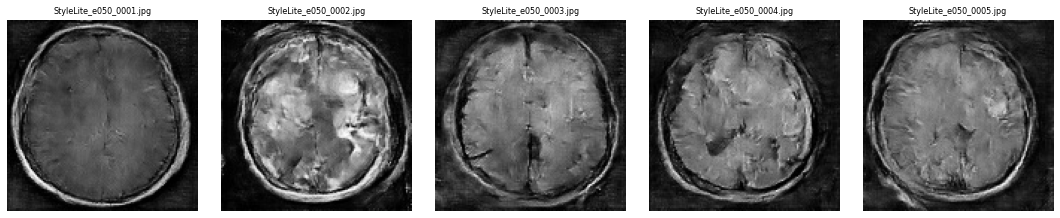

## WGAN_GP/e010  —  155 image(s)

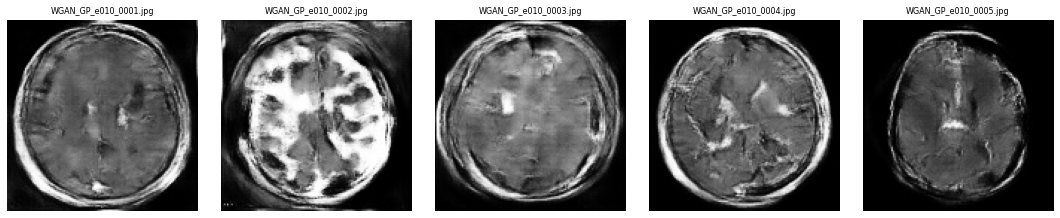

## WGAN_GP/e030  —  155 image(s)

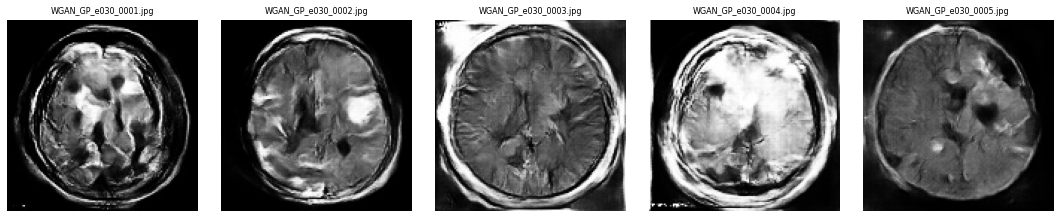

## WGAN_GP/e050  —  155 image(s)

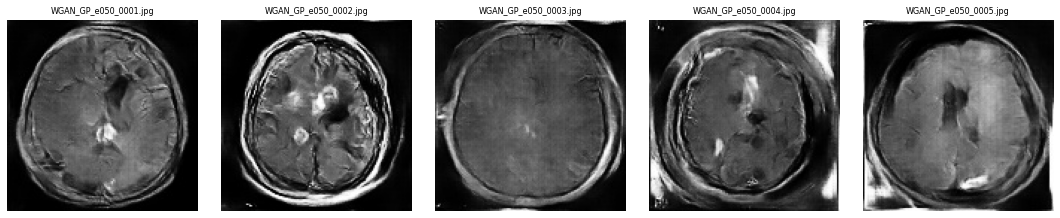

In [37]:
# === Show 5 images from every singles folder, with headings ====================
import os, glob, cv2
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

ROOT = "/kaggle/working/gan_mri_outputs/singles_direct"  # change if needed
N_SHOW = 5                                                # images per folder

def find_image_files(d):
    files = []
    for ext in ("*.jpg", "*.jpeg", "*.png"):
        files.extend(glob.glob(os.path.join(d, ext)))
    return sorted(files)

# Collect leaf folders that actually contain images
folders = []
for dirpath, dirnames, filenames in os.walk(ROOT):
    files = find_image_files(dirpath)
    if files:
        folders.append((dirpath, files))

# Sort folders nicely (by model then epoch in the path)
folders = sorted(folders, key=lambda x: x[0].lower())

if not folders:
    display(Markdown(f"**No images found under `{ROOT}`.**"))
else:
    for dirpath, files in folders:
        rel = os.path.relpath(dirpath, ROOT)
        display(Markdown(f"## {rel}  —  {len(files)} image(s)"))
        k = min(N_SHOW, len(files))
        fig, axes = plt.subplots(1, k, figsize=(3*k, 3))
        if k == 1:
            axes = [axes]
        for i, fp in enumerate(files[:k]):
            img = cv2.imread(fp, cv2.IMREAD_GRAYSCALE)
            if img is None:
                axes[i].axis('off')
                axes[i].set_title("read fail")
                continue
            axes[i].imshow(img, cmap='gray')
            axes[i].set_title(os.path.basename(fp), fontsize=8)
            axes[i].axis('off')
        plt.tight_layout()
        plt.show()


# Conclusion

<p style="font-size:20px">
    As we can see from the plot, the distribution of Generated Images is approximately the same as that of the Real Images. From this we can conclude that the generated images are a true representative of the real ones, capturing most of the variations.
</p>

# References

<p style="font-size:20px">
<ul>
    <li style="font-size:20px"><a href="https://arxiv.org/abs/1406.2661">Generative Adversarial Networks</a> (2014)</li>
    <li style="font-size:20px"><a href="https://arxiv.org/abs/1606.03498">Improved Techniques for Training GANs</a> (2016)</li>
    <li style="font-size:20px"><a href="https://arxiv.org/abs/2108.03235">SMOTified-GAN for class imbalanced pattern classification problems</a> (2021)</li>
</ul>
</p>

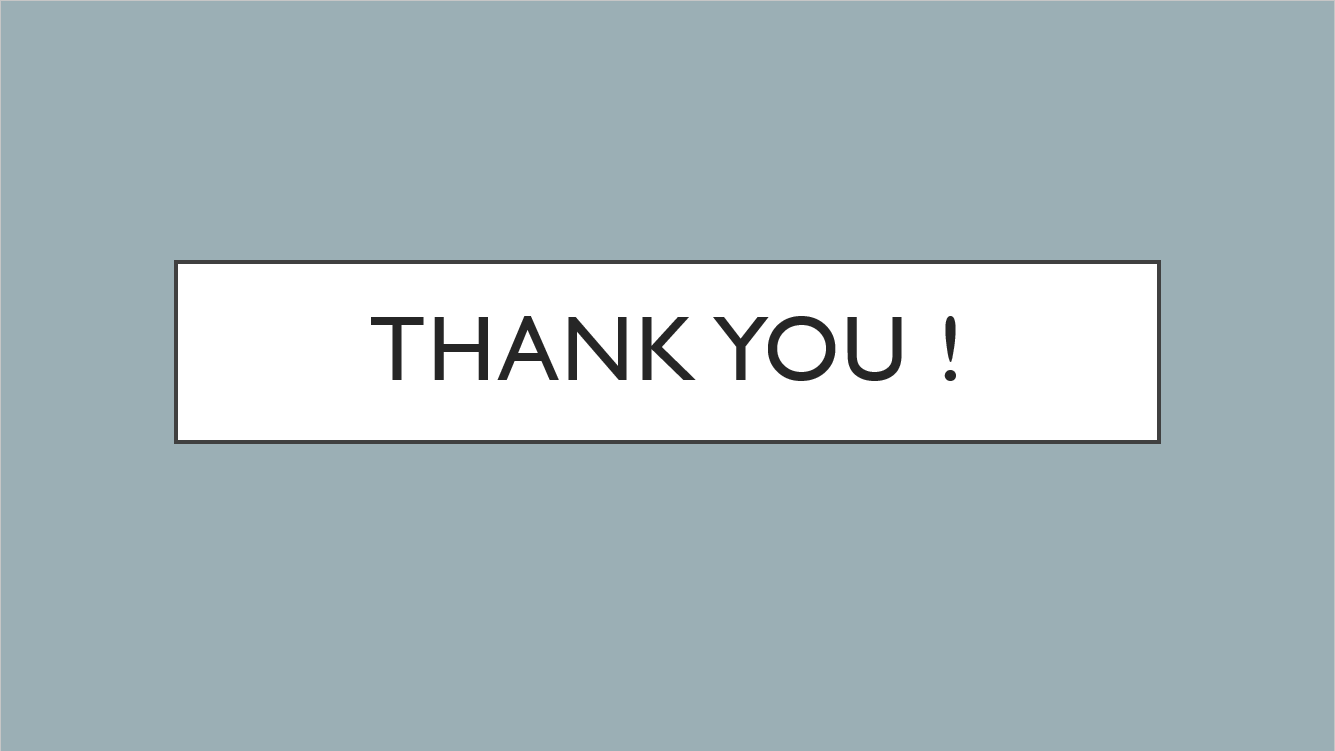